In [144]:
import os
import imageio
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage, misc

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [2]:
letterDict={
  "a": 0,"b": 1,"c": 2,"d": 3,"e": 4,"f": 5,"g": 6,"h": 7,"i": 8,
    "j": 9,"k": 10,"l": 11,"m": 12,"n": 13,"o": 14,"p": 15,"q": 16,"r": 17,
    "s": 18,"t": 19,"u": 20,"v": 21,"w": 22,"x": 23,"y": 24,"z": 25}

numberDict={
    0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I",
    9:"J", 10:"K", 11:"L", 12:"M", 13:"N", 14:"O", 15:"P", 16:"Q", 17:"R",
    18:"S", 19:"T", 20:"U", 21:"V", 22:"W", 23:"X", 24:"Y", 25:"Z"}


def readPicture(df_complete, directory,letter_value):
    im = imageio.imread(directory)
    im.shape
    print("Letter value: ", directory, end="\r")

    im=np.reshape(im,400)
    df = pd.DataFrame(data=im).T
    y = np.repeat(0,400)
    df['Letter'] = letter_value
    
    return df_complete.append(df, ignore_index=True)

#Method ment for adding augmented pictures to a dataset
def addPictureToDataset(dataset, picture, letter_value):
    picture = np.reshape(picture,400)
    df = pd.DataFrame(data=picture).T
    df['Letter'] = letter_value
    return dataset.append(df, ignore_index=True)



In [3]:
## *** Data augmentation *** ##

# Noise:



In [3]:
def read_all_images(upper_directory):
    number_of_images = 0
    original_imgs = pd.DataFrame()
    aug20 = pd.DataFrame()
    aug90 = pd.DataFrame()
    aug270 = pd.DataFrame()
    aug320 = pd.DataFrame()
    for subdir, dirs, files in os.walk(upper_directory):
        for file in files:
            number_of_images+=1
            #print os.path.join(subdir, file)
            filepath = subdir + os.sep + file
            if filepath.endswith(".jpg"):
                # print(filepath)
                # Rotate every image that is being loaded:
            
                x = filepath.split("/")
                rotate20 = rotate_image(filepath,x[-1],20)
                rotate90 = rotate_image(filepath,x[-1],90)
                rotate270 = rotate_image(filepath,x[-1],270)
                rotate320 = rotate_image(filepath,x[-1],320)
                                
                # The label for the data:
                letter = (x[-1][0])
                letter_val = letterDict.get(letter)
                original_imgs = readPicture(original_imgs,filepath,letter_val)
                aug20 = addPictureToDataset(aug20, rotate20, letter_val)
                aug90 = addPictureToDataset(aug90, rotate90, letter_val)
                aug270 = addPictureToDataset(aug270, rotate270, letter_val)
                aug320 = addPictureToDataset(aug320, rotate320, letter_val)
    print("image")
    # vv.imshow("./dataset3/chars74k-lite/augmented/rotated_neg_a102.jpg")
    print("number_of_images", number_of_images)
    return original_imgs, aug20, aug90, aug270, aug320


#Rotates an image, stores it in a folder and returns the rotated image
def rotate_image(image_path,ending,deg):
    out_path = "./dataset3/augmented/"
    image_to_rotate = plt.imread(image_path)
    
    # Rotating the image:
    rotated_positive = ndimage.rotate(image_to_rotate, deg, reshape=False)
   
    fullpath = os.path.join(out_path, 'rotated_'+ str(deg) + '_' + ending)
    imageio.imwrite(fullpath, rotated_positive)
    return rotated_positive
    
    
               
# Unaugmented data, no feature selection:            
original_raw, aug20, aug90, aug270, aug320 = read_all_images("./dataset3/chars74k-lite")
original_raw
               


imager value:  ./dataset3/chars74k-lite/z/z_9.jpggg./dataset3/chars74k-lite/a/a_434.jpg ./dataset3/chars74k-lite/a/a_630.jpg ./dataset3/chars74k-lite/b/b_56.jpg ./dataset3/chars74k-lite/d/d_9.jpg ./dataset3/chars74k-lite/e/e_106.jpg ./dataset3/chars74k-lite/e/e_33.jpg ./dataset3/chars74k-lite/e/e_350.jpg ./dataset3/chars74k-lite/g/g_107.jpg ./dataset3/chars74k-lite/g/g_140.jpg ./dataset3/chars74k-lite/h/h_119.jpg ./dataset3/chars74k-lite/h/h_191.jpg ./dataset3/chars74k-lite/i/i_243.jpg ./dataset3/chars74k-lite/i/i_344.jpg ./dataset3/chars74k-lite/i/i_69.jpg ./dataset3/chars74k-lite/j/j_4.jpg ./dataset3/chars74k-lite/n/n_25.jpg ./dataset3/chars74k-lite/n/n_324.jpg ./dataset3/chars74k-lite/n/n_341.jpg ./dataset3/chars74k-lite/o/o_283.jpg ./dataset3/chars74k-lite/o/o_507.jpg ./dataset3/chars74k-lite/r/r_211.jpg ./dataset3/chars74k-lite/r/r_233.jpg ./dataset3/chars74k-lite/r/r_271.jpg ./dataset3/chars74k-lite/r/r_97.jpg ./dataset3/chars74k-lite/s/s_240.jpg ./dataset3/chars74k-lite/t/t_392.

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Letter
0,193,175,177,191,177,188,194,177,197,157,...,175,191,175,183,188,225,185,167,193,0
1,37,34,37,46,50,45,40,39,39,38,...,34,34,35,36,37,36,36,37,38,0
2,25,33,40,42,40,38,36,35,42,46,...,33,38,38,32,31,51,43,41,41,0
3,27,34,36,30,31,35,32,23,20,12,...,24,23,23,27,40,8,27,33,20,0
4,186,192,175,189,202,182,181,188,191,193,...,194,196,185,182,196,193,190,191,194,0
5,34,37,7,25,14,19,22,26,34,13,...,14,15,19,20,17,8,30,21,15,0
6,40,5,5,0,34,8,16,38,22,40,...,35,12,0,57,31,29,6,47,59,0
7,232,251,223,238,237,221,235,232,231,216,...,20,37,35,42,22,56,37,41,13,0
8,232,228,228,229,230,234,212,138,45,45,...,232,235,199,69,26,34,54,49,96,0
9,223,229,220,216,226,222,217,231,238,225,...,229,234,228,222,223,227,227,227,227,0


In [4]:
#Methood merges dataset1 with dataset2
def mergeData(dataset1, dataset2):
    return dataset1.append(dataset2, ignore_index=True)

mergedData = mergeData(original_raw, aug20)
mergedData = mergeData(mergedData, aug90)
mergedData = mergeData(mergedData, aug270)
mergedData = mergeData(mergedData, aug320)
mergedData

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Letter
0,193,175,177,191,177,188,194,177,197,157,...,175,191,175,183,188,225,185,167,193,0
1,37,34,37,46,50,45,40,39,39,38,...,34,34,35,36,37,36,36,37,38,0
2,25,33,40,42,40,38,36,35,42,46,...,33,38,38,32,31,51,43,41,41,0
3,27,34,36,30,31,35,32,23,20,12,...,24,23,23,27,40,8,27,33,20,0
4,186,192,175,189,202,182,181,188,191,193,...,194,196,185,182,196,193,190,191,194,0
5,34,37,7,25,14,19,22,26,34,13,...,14,15,19,20,17,8,30,21,15,0
6,40,5,5,0,34,8,16,38,22,40,...,35,12,0,57,31,29,6,47,59,0
7,232,251,223,238,237,221,235,232,231,216,...,20,37,35,42,22,56,37,41,13,0
8,232,228,228,229,230,234,212,138,45,45,...,232,235,199,69,26,34,54,49,96,0
9,223,229,220,216,226,222,217,231,238,225,...,229,234,228,222,223,227,227,227,227,0


In [6]:
# splitting function:
def get_train_test_set(data):
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    
    for i in range(26):
        #print(data.loc[data['Letter']==i])
        train, test = train_test_split(data.loc[data['Letter']==i], 
                                       test_size=0.2, shuffle=True)
        
        #print(train)
        train_set = train_set.append([train], ignore_index=True)
        test_set = test_set.append([test], ignore_index=True)
    return train_set, test_set

## Running models on the data:
### kNN (On Raw, merged, feature-treated data)


In [163]:
#### Running models on the raw data:



def calc_predictions(classifier, train):
    y_pred = []
    n = train.shape[0]
    counter = 0
    clf = classifier.fit(train, train.iloc[:,-1])
    for row in train.iterrows():
        y_pred.append(clf.predict([row[1].tolist()]))
        counter +=1
        print((n/counter)*100,"%")
    return y_pred,clf

def test_classifier(clf, data):
    y = []
    for row in data.iterrows():
        y.append(clf.predict(([row[1].tolist()])))
    return y



In [ ]:

# Raw training and test set:
train_set_raw, test_set_raw = get_train_test_set(original_raw)

#### KNN #####
neigh = KNeighborsClassifier(n_neighbors=3)
y_raw_train_pred, clf = calc_predictions(neigh,train_set_raw)

y_test_pred = test_classifier(clf, test_set_raw)

In [150]:
### Running model on the augmented + raw data:

train_set_merged, test_set_merged = get_train_test_set(mergedData)

neigh = KNeighborsClassifier(n_neighbors=3)
y_merged_train_pred, clf = calc_predictions(neigh, train_set_merged)

y_merged_test_pred = test_classifier(clf, test_set_merged)


### Accuracy scores for knn


In [153]:
## Raw data:
# Train:
print("accuracy_score_knn_training_data:", accuracy_score( train_set_raw.iloc[:,-1],y_raw_train_pred))
# Test:
print("accuracy_score_knn_test_data:", accuracy_score( test_set_raw.iloc[:,-1],y_test_pred))


print(train_set_merged.iloc[:,-1].shape)

## Merged data:
# Train:
print("accuracy_score_knn_training_data:", accuracy_score( train_set_merged.iloc[:,-1],y_merged_train_pred))
# Test
print("accuracy_score_knn_test_data:", accuracy_score( test_set_merged.iloc[:,-1],y_merged_test_pred))



accuracy_score_knn_training_data: 0.7834507042253521
accuracy_score_knn_test_data: 0.6801675977653632
(28448,)
accuracy_score_knn_training_data: 0.7734462879640045
accuracy_score_knn_test_data: 0.6848987626546682


## Random Forest (On Raw, merged, feature-treated data)


In [164]:
clf_rf = RandomForestClassifier(n_estimators=1000,random_state=0)

y_raw_train_pred_rf, clf_rf = calc_predictions(clf_rf,train_set_raw)

y_test_pred_rf = test_classifier(clf_rf, test_set_raw)

568000.0 %
284000.0 %
189333.3333333333 %
142000.0 %
113600.0 %
94666.66666666666 %
81142.85714285714 %
71000.0 %
63111.11111111111 %
56800.0 %
51636.36363636364 %
47333.33333333333 %
43692.30769230769 %
40571.42857142857 %
37866.66666666667 %
35500.0 %
33411.76470588236 %
31555.555555555555 %
29894.736842105267 %
28400.0 %
27047.61904761905 %
25818.18181818182 %
24695.652173913044 %
23666.666666666664 %
22720.0 %
21846.153846153844 %
21037.037037037036 %
20285.714285714286 %
19586.206896551725 %
18933.333333333336 %
18322.580645161288 %
17750.0 %
17212.121212121212 %
16705.88235294118 %
16228.571428571428 %
15777.777777777777 %
15351.351351351352 %
14947.368421052633 %
14564.102564102563 %
14200.0 %
13853.658536585366 %
13523.809523809525 %
13209.302325581397 %
12909.09090909091 %
12622.222222222223 %
12347.826086956522 %
12085.106382978724 %
11833.333333333332 %
11591.836734693878 %
11360.0 %
11137.254901960785 %
10923.076923076922 %
10716.981132075472 %
10518.518518518518 %
10327.27

1368.6746987951806 %
1365.3846153846152 %
1362.1103117505995 %
1358.8516746411483 %
1355.6085918854417 %
1352.3809523809523 %
1349.1686460807603 %
1345.9715639810427 %
1342.789598108747 %
1339.622641509434 %
1336.4705882352941 %
1333.3333333333335 %
1330.2107728337237 %
1327.1028037383178 %
1324.009324009324 %
1320.9302325581396 %
1317.8654292343388 %
1314.8148148148148 %
1311.7782909930716 %
1308.7557603686635 %
1305.7471264367816 %
1302.7522935779816 %
1299.771167048055 %
1296.8036529680364 %
1293.8496583143508 %
1290.9090909090908 %
1287.9818594104308 %
1285.0678733031675 %
1282.1670428893904 %
1279.2792792792793 %
1276.4044943820224 %
1273.542600896861 %
1270.6935123042506 %
1267.857142857143 %
1265.033407572383 %
1262.2222222222222 %
1259.4235033259424 %
1256.637168141593 %
1253.8631346578366 %
1251.101321585903 %
1248.3516483516485 %
1245.6140350877195 %
1242.8884026258206 %
1240.174672489083 %
1237.4727668845314 %
1234.7826086956522 %
1232.1041214750542 %
1229.4372294372295 %
12

686.819830713422 %
685.9903381642513 %
685.1628468033776 %
684.3373493975903 %
683.5138387484958 %
682.6923076923076 %
681.8727490996398 %
681.0551558752998 %
680.2395209580839 %
679.4258373205741 %
678.6140979689367 %
677.8042959427208 %
676.9964243146603 %
676.1904761904761 %
675.3864447086802 %
674.5843230403801 %
673.7841043890866 %
672.9857819905213 %
672.189349112426 %
671.3947990543735 %
670.6021251475797 %
669.811320754717 %
669.0223792697291 %
668.2352941176471 %
667.4500587544065 %
666.6666666666667 %
665.8851113716296 %
665.1053864168618 %
664.327485380117 %
663.5514018691589 %
662.777129521587 %
662.004662004662 %
661.2339930151338 %
660.4651162790698 %
659.698025551684 %
658.9327146171694 %
658.1691772885284 %
657.4074074074074 %
656.6473988439307 %
655.8891454965358 %
655.1326412918108 %
654.3778801843317 %
653.6248561565017 %
652.8735632183908 %
652.1239954075776 %
651.3761467889908 %
650.6300114547537 %
649.8855835240275 %
649.1428571428571 %
648.4018264840182 %
647.662

457.6954069298952 %
457.3268921095008 %
456.9589702333065 %
456.5916398713826 %
456.22489959839356 %
455.8587479935794 %
455.4931836407378 %
455.1282051282051 %
454.7638110488391 %
454.4 %
454.03677058353315 %
453.6741214057508 %
453.31205107741425 %
452.9505582137161 %
452.589641434263 %
452.22929936305735 %
451.86953062848045 %
451.51033386327504 %
451.1517077045274 %
450.7936507936508 %
450.43616177636795 %
450.07923930269413 %
449.72288202692 %
449.36708860759495 %
449.0118577075099 %
448.6571879936809 %
448.30307813733225 %
447.9495268138801 %
447.5965327029157 %
447.244094488189 %
446.89221085759243 %
446.5408805031447 %
446.1901021209741 %
445.83987441130296 %
445.4901960784314 %
445.14106583072095 %
444.7924823805795 %
444.44444444444446 %
444.0969507427678 %
443.75 %
443.4035909445745 %
443.0577223088924 %
442.7123928293063 %
442.36760124610595 %
442.02334630350197 %
441.6796267496112 %
441.33644133644134 %
440.99378881987576 %
440.6516679596587 %
440.31007751937983 %
439.9690

344.66019417475724 %
344.45118253486964 %
344.24242424242425 %
344.0339188370685 %
343.82566585956414 %
343.61766485178464 %
343.409915356711 %
343.202416918429 %
342.99516908212564 %
342.7881713940857 %
342.5814234016888 %
342.3749246534057 %
342.16867469879514 %
341.9626730885009 %
341.7569193742479 %
341.5514131088394 %
341.3461538461538 %
341.14114114114113 %
340.9363745498199 %
340.73185362927416 %
340.5275779376499 %
340.32354703415217 %
340.11976047904193 %
339.9162178336326 %
339.7129186602871 %
339.50986252241483 %
339.30704898446834 %
339.1044776119403 %
338.9021479713604 %
338.7000596302922 %
338.49821215733016 %
338.2966051220965 %
338.0952380952381 %
337.8941106484235 %
337.6932223543401 %
337.4925727866904 %
337.29216152019006 %
337.0919881305638 %
336.8920521945433 %
336.69235328986366 %
336.49289099526067 %
336.29366489046777 %
336.094674556213 %
335.8959195742164 %
335.69739952718675 %
335.49911399881864 %
335.30106257378986 %
335.10324483775815 %
334.9056603773585 %
3

276.668290306868 %
276.5335929892892 %
276.39902676399026 %
276.26459143968873 %
276.130286825474 %
275.9961127308066 %
275.86206896551727 %
275.7281553398058 %
275.59437166424067 %
275.4607177497575 %
275.32719340765874 %
275.1937984496124 %
275.0605326876513 %
274.9273959341723 %
274.7943880019352 %
274.6615087040619 %
274.52875785403575 %
274.3961352657005 %
274.2636407532593 %
274.1312741312741 %
273.99903521466473 %
273.86692381870785 %
273.73493975903614 %
273.6030828516378 %
273.4713529128551 %
273.33974975938406 %
273.20827320827317 %
273.0769230769231 %
272.9456991830851 %
272.8146013448607 %
272.6836293807009 %
272.552783109405 %
272.4220623501199 %
272.2914669223394 %
272.16099664590325 %
272.03065134099614 %
271.9004308281475 %
271.77033492822966 %
271.64036346245814 %
271.51051625239006 %
271.38079311992357 %
271.25119388729706 %
271.1217183770883 %
270.99236641221376 %
270.86313781592753 %
270.73403241182075 %
270.60505002382087 %
270.4761904761905 %
270.3474535935269 %
2

231.45884270578648 %
231.36456211812626 %
231.27035830618894 %
231.17623117623117 %
231.08218063466234 %
230.98820658804394 %
230.89430894308944 %
230.80048760666395 %
230.7067424857839 %
230.61307348761676 %
230.5194805194805 %
230.42596348884382 %
230.33252230332525 %
230.23915687069314 %
230.14586709886547 %
230.05265289590926 %
229.95951417004048 %
229.86645082962363 %
229.7734627831715 %
229.68054993934493 %
229.5877122069523 %
229.4949494949495 %
229.40226171243944 %
229.3096487686718 %
229.21711057304276 %
229.1246470350948 %
229.03225806451616 %
228.93994357114065 %
228.8477034649476 %
228.75553765606122 %
228.6634460547504 %
228.57142857142856 %
228.47948511665325 %
228.38761560112584 %
228.2958199356913 %
228.20409803133788 %
228.11244979919678 %
228.02087515054197 %
227.9293739967897 %
227.8379462494986 %
227.7465918203689 %
227.65531062124248 %
227.56410256410254 %
227.4729675610733 %
227.38190552441955 %
227.29091636654664 %
227.2 %
227.10915633746504 %
227.01838529176658 

199.01892081289418 %
198.9492119089317 %
198.8795518207283 %
198.80994049702485 %
198.740377886634 %
198.67086393844002 %
198.6013986013986 %
198.5319818245369 %
198.4626135569532 %
198.39329374781698 %
198.32402234636874 %
198.25479930191972 %
198.18562456385206 %
198.11649808161843 %
198.047419804742 %
197.97838968281633 %
197.90940766550523 %
197.84047370254268 %
197.77158774373257 %
197.70274973894882 %
197.633959638135 %
197.56521739130434 %
197.49652294853962 %
197.42787625999304 %
197.35927727588603 %
197.2907259465092 %
197.22222222222223 %
197.15376605345367 %
197.0853573907009 %
197.01699618453 %
196.94868238557558 %
196.88041594454074 %
196.81219681219682 %
196.74402493938342 %
196.6759002770083 %
196.60782277604707 %
196.53979238754323 %
196.47180906260812 %
196.40387275242045 %
196.33598340822675 %
196.2681409813407 %
196.20034542314335 %
196.13259668508286 %
196.0648947186745 %
195.99723947550035 %
195.92963090720937 %
195.86206896551724 %
195.79455360220615 %
195.7270847

174.55439459127228 %
174.50076804915514 %
174.44717444717446 %
174.39361375498925 %
174.3400859422959 %
174.28659097882786 %
174.23312883435582 %
174.17969947868752 %
174.12630288166767 %
174.07293901317806 %
174.01960784313727 %
173.96630934150076 %
173.91304347826087 %
173.85981022344657 %
173.80660954712363 %
173.7534414193943 %
173.70030581039754 %
173.64720269030877 %
173.59413202933985 %
173.54109379773908 %
173.48808796579107 %
173.43511450381678 %
173.3821733821734 %
173.32926457125419 %
173.2763880414887 %
173.2235437633425 %
173.17073170731706 %
173.11795184395004 %
173.06520414381475 %
173.01248857752057 %
172.95980511571253 %
172.90715372907152 %
172.85453438831405 %
172.80194706419226 %
172.74939172749393 %
172.69686834904226 %
172.64437689969606 %
172.59191735034943 %
172.53948967193196 %
172.48709383540844 %
172.434729811779 %
172.38239757207893 %
172.33009708737862 %
172.27782832878373 %
172.22559126743482 %
172.17338587450743 %
172.12121212121212 %
172.0690699787943 %


155.573815393043 %
155.53121577217962 %
155.48863947440458 %
155.44608648056922 %
155.40355677154582 %
155.36105032822758 %
155.3185671315286 %
155.27610716238382 %
155.23367040174912 %
155.19125683060108 %
155.14886642993716 %
155.10649918077553 %
155.06415506415507 %
155.02183406113537 %
154.97953615279673 %
154.93726132024003 %
154.89500954458686 %
154.8527808069793 %
154.81057508858 %
154.7683923705722 %
154.72623263415963 %
154.68409586056643 %
154.6419820310373 %
154.59989112683724 %
154.55782312925172 %
154.51577801958652 %
154.4737557791678 %
154.43175638934204 %
154.38977983147595 %
154.34782608695653 %
154.305895137191 %
154.26398696360673 %
154.22210154765136 %
154.1802388707926 %
154.13839891451832 %
154.09658166033643 %
154.0547870897749 %
154.01301518438177 %
153.9712659257251 %
153.92953929539294 %
153.88783527499322 %
153.84615384615387 %
153.8044949905226 %
153.76285868976717 %
153.7212449255751 %
153.67965367965368 %
153.63808493373006 %
153.5965386695511 %
153.555014

140.21229326092325 %
140.177690029615 %
140.14310387367382 %
140.10853478046374 %
140.0739827373613 %
140.03944773175542 %
140.00492975104757 %
139.97042878265157 %
139.9359448139936 %
139.9014778325123 %
139.8670278256587 %
139.8325947808961 %
139.7981786857002 %
139.76377952755905 %
139.72939729397294 %
139.6950319724545 %
139.66068355052866 %
139.62635201573255 %
139.59203735561562 %
139.55773955773955 %
139.52345860967822 %
139.48919449901769 %
139.45494721335626 %
139.42071674030436 %
139.38650306748465 %
139.3523061825319 %
139.31812607309294 %
139.28396272682687 %
139.24981613140474 %
139.2156862745098 %
139.1815731438373 %
139.14747672709456 %
139.11339701200097 %
139.07933398628796 %
139.0452876376989 %
139.01125795398923 %
138.97724492292636 %
138.94324853228963 %
138.90926876987038 %
138.8753056234719 %
138.8413590809093 %
138.80742913000978 %
138.77351575861226 %
138.73961895456765 %
138.7057387057387 %
138.671875 %
138.63802782523797 %
138.6041971693509 %
138.5703830202488

127.6978417266187 %
127.6691391323893 %
127.64044943820225 %
127.61177263536283 %
127.5831087151842 %
127.55445766898721 %
127.52581948810058 %
127.49719416386083 %
127.46858168761221 %
127.43998205070675 %
127.41139524450426 %
127.38282126037228 %
127.3542600896861 %
127.32571172382873 %
127.29717615419094 %
127.26865337217119 %
127.24014336917561 %
127.21164613661816 %
127.1831616659203 %
127.15468994851132 %
127.12623097582811 %
127.09778473931527 %
127.06935123042507 %
127.0409304406173 %
127.01252236135959 %
126.98412698412697 %
126.95574430040233 %
126.92737430167598 %
126.89901697944595 %
126.87067232521778 %
126.8423403305047 %
126.81402098682742 %
126.78571428571428 %
126.75742021870118 %
126.72913877733154 %
126.70086995315637 %
126.67261373773417 %
126.64437012263099 %
126.61613909942042 %
126.58792065968353 %
126.55971479500892 %
126.53152149699265 %
126.5033407572383 %
126.47517256735694 %
126.44701691896705 %
126.41887380369464 %
126.39074321317312 %
126.36262513904337 %


117.30689797604296 %
117.28267602725583 %
117.25846407927332 %
117.234262125903 %
117.21007016095749 %
117.1858881782546 %
117.16171617161717 %
117.13755413487317 %
117.11340206185568 %
117.0892599464028 %
117.06512778235778 %
117.04100556356893 %
117.01689328388957 %
116.99279093717816 %
116.96869851729818 %
116.94461601811818 %
116.92054343351172 %
116.89648075735748 %
116.8724279835391 %
116.84838510594528 %
116.82435211846978 %
116.80032901501131 %
116.7763157894737 %
116.75231243576567 %
116.72831894780107 %
116.70433531949867 %
116.68036154478226 %
116.65639761758062 %
116.6324435318275 %
116.6084992814617 %
116.58456486042692 %
116.56064026267185 %
116.53672548215019 %
116.5128205128205 %
116.48892534864643 %
116.46503998359647 %
116.44116441164411 %
116.41729862676777 %
116.39344262295081 %
116.36959639418151 %
116.34575993445308 %
116.32193323776367 %
116.2981162981163 %
116.27430910951892 %
116.25051166598443 %
116.2267239615306 %
116.20294599018004 %
116.17917774596032 %
116

108.45904143593661 %
108.43833524245896 %
108.4176369536171 %
108.3969465648855 %
108.37626407174203 %
108.35558946966806 %
108.33492275414838 %
108.31426392067125 %
108.2936129647283 %
108.27296988181472 %
108.25233466742901 %
108.23170731707317 %
108.21108782625262 %
108.19047619047619 %
108.16987240525616 %
108.14927646610815 %
108.1286883685513 %
108.10810810810811 %
108.08753568030447 %
108.06697108066972 %
108.04641430473654 %
108.02586534804108 %
108.00532420612284 %
107.9847908745247 %
107.96426534879299 %
107.94374762447738 %
107.92323769713093 %
107.90273556231003 %
107.88224121557455 %
107.86175465248766 %
107.84127586861591 %
107.82080485952923 %
107.80034162080092 %
107.77988614800759 %
107.75943843672928 %
107.7389984825493 %
107.71856628105442 %
107.69814182783466 %
107.67772511848341 %
107.65731614859742 %
107.63691491377676 %
107.61652140962485 %
107.59613563174844 %
107.57575757575756 %
107.55538723726568 %
107.53502461188944 %
107.51466969524893 %
107.49432248296745 

100.87018291600072 %
100.85227272727273 %
100.8343688975679 %
100.81647142350019 %
100.79858030168589 %
100.78069552874378 %
100.76281710129503 %
100.74494501596311 %
100.727079269374 %
100.70921985815602 %
100.69136677893991 %
100.67352002835874 %
100.65567960304801 %
100.63784549964565 %
100.62001771479186 %
100.60219624512929 %
100.58438108730299 %
100.56657223796034 %
100.54876969375111 %
100.53097345132744 %
100.51318350734384 %
100.49539985845719 %
100.47762250132672 %
100.45985143261409 %
100.44208664898319 %
100.42432814710043 %
100.40657592363445 %
100.38882997525627 %
100.37109029863933 %
100.35335689045937 %
100.33562974739445 %
100.31790886612504 %
100.30019424333392 %
100.2824858757062 %
100.2647837599294 %
100.24708789269326 %
100.22939827068996 %
100.21171489061398 %
100.1940377491621 %
100.1763668430335 %
100.15870216892964 %
100.1410437235543 %
100.1233915036136 %
100.10574550581602 %
100.08810572687226 %
100.07047216349542 %
100.0528448124009 %
100.03522367030644 %
10

In [166]:
y_merged_train_pred_rf, clf = calc_predictions(clf_rf, train_set_merged)

y_merged_test_pred_rf = test_classifier(clf, test_set_merged)


2844800.0 %
1422400.0 %
948266.6666666666 %
711200.0 %
568960.0 %
474133.3333333333 %
406400.0 %
355600.0 %
316088.8888888889 %
284480.0 %
258618.1818181818 %
237066.66666666666 %
218830.76923076925 %
203200.0 %
189653.33333333334 %
177800.0 %
167341.17647058825 %
158044.44444444444 %
149726.31578947368 %
142240.0 %
135466.6666666667 %
129309.0909090909 %
123686.95652173912 %
118533.33333333333 %
113792.0 %
109415.38461538462 %
105362.96296296295 %
101600.0 %
98096.55172413793 %
94826.66666666667 %
91767.74193548386 %
88900.0 %
86206.06060606061 %
83670.58823529413 %
81280.0 %
79022.22222222222 %
76886.4864864865 %
74863.15789473684 %
72943.58974358975 %
71120.0 %
69385.36585365854 %
67733.33333333334 %
66158.13953488372 %
64654.54545454545 %
63217.77777777778 %
61843.47826086956 %
60527.65957446809 %
59266.666666666664 %
58057.142857142855 %
56896.0 %
55780.39215686274 %
54707.69230769231 %
53675.47169811321 %
52681.481481481474 %
51723.63636363637 %
50800.0 %
49908.77192982456 %
4904

6757.244655581948 %
6741.232227488152 %
6725.295508274232 %
6709.433962264151 %
6693.64705882353 %
6677.934272300469 %
6662.295081967212 %
6646.728971962617 %
6631.235431235432 %
6615.813953488371 %
6600.46403712297 %
6585.185185185184 %
6569.976905311778 %
6554.8387096774195 %
6539.770114942528 %
6524.7706422018355 %
6509.839816933638 %
6494.977168949772 %
6480.182232346242 %
6465.454545454546 %
6450.79365079365 %
6436.1990950226245 %
6421.670428893905 %
6407.207207207208 %
6392.808988764044 %
6378.47533632287 %
6364.20581655481 %
6350.0 %
6335.857461024499 %
6321.777777777777 %
6307.760532150776 %
6293.805309734514 %
6279.91169977925 %
6266.079295154185 %
6252.307692307692 %
6238.59649122807 %
6224.945295404814 %
6211.353711790393 %
6197.821350762527 %
6184.347826086957 %
6170.932754880694 %
6157.575757575758 %
6144.276457883369 %
6131.0344827586205 %
6117.8494623655915 %
6104.721030042919 %
6091.648822269807 %
6078.6324786324785 %
6065.671641791045 %
6052.765957446808 %
6039.9150743

3411.031175059952 %
3406.9461077844308 %
3402.8708133971295 %
3398.805256869773 %
3394.7494033412886 %
3390.7032181168056 %
3386.6666666666665 %
3382.639714625446 %
3378.622327790974 %
3374.614472123369 %
3370.616113744076 %
3366.6272189349115 %
3362.647754137116 %
3358.6776859504134 %
3354.7169811320755 %
3350.765606595995 %
3346.823529411765 %
3342.8907168037604 %
3338.9671361502346 %
3335.052754982415 %
3331.147540983606 %
3327.251461988304 %
3323.3644859813085 %
3319.4865810968495 %
3315.617715617716 %
3311.7578579743886 %
3307.9069767441856 %
3304.0650406504064 %
3300.232018561485 %
3296.40787949015 %
3292.592592592592 %
3288.78612716763 %
3284.988452655889 %
3281.1995386389854 %
3277.4193548387098 %
3273.647871116226 %
3269.885057471264 %
3266.130884041332 %
3262.3853211009177 %
3258.64833906071 %
3254.919908466819 %
3251.2 %
3247.488584474886 %
3243.7856328392245 %
3240.091116173121 %
3236.4050056882825 %
3232.727272727273 %
3229.0578887627694 %
3225.396825396825 %
3221.74405436

2296.045197740113 %
2294.1935483870966 %
2292.344883158743 %
2290.4991948470206 %
2288.656476267096 %
2286.816720257235 %
2284.979919678715 %
2283.14606741573 %
2281.315156375301 %
2279.4871794871797 %
2277.6621297037627 %
2275.84 %
2274.020783373301 %
2272.2044728434503 %
2270.391061452514 %
2268.580542264753 %
2266.772908366534 %
2264.968152866242 %
2263.1662688941924 %
2261.367249602544 %
2259.5710881652108 %
2257.777777777778 %
2255.987311657415 %
2254.1996830427893 %
2252.4148851939826 %
2250.632911392405 %
2248.8537549407115 %
2247.0774091627172 %
2245.303867403315 %
2243.533123028391 %
2241.765169424744 %
2240.0 %
2238.2376081825337 %
2236.4779874213837 %
2234.7211311861747 %
2232.967032967033 %
2231.2156862745096 %
2229.467084639499 %
2227.721221613156 %
2225.9780907668232 %
2224.237685691947 %
2222.5 %
2220.7650273224044 %
2219.0327613104523 %
2217.30319563523 %
2215.576323987539 %
2213.852140077821 %
2212.130637636081 %
2210.4118104118106 %
2208.695652173913 %
2206.9821567106

1733.5770871419863 %
1732.5213154689404 %
1731.4668289713939 %
1730.4136253041363 %
1729.3617021276596 %
1728.3110571081409 %
1727.2616879174254 %
1726.2135922330096 %
1725.166767738023 %
1724.1212121212122 %
1723.076923076923 %
1722.0338983050847 %
1720.9921355111917 %
1719.9516324062877 %
1718.9123867069486 %
1717.874396135266 %
1716.837658418829 %
1715.8021712907118 %
1714.7679324894516 %
1713.7349397590363 %
1712.7031908488864 %
1711.6726835138386 %
1710.6434155141312 %
1709.6153846153848 %
1708.5885885885887 %
1707.563025210084 %
1706.5386922615478 %
1705.515587529976 %
1704.4937088076695 %
1703.4730538922154 %
1702.4536205864752 %
1701.4354066985647 %
1700.418410041841 %
1699.4026284348865 %
1698.3880597014925 %
1697.3747016706443 %
1696.3625521765057 %
1695.3516090584028 %
1694.34187016081 %
1693.3333333333333 %
1692.325996430696 %
1691.319857312723 %
1690.3149138443257 %
1689.311163895487 %
1688.3086053412462 %
1687.3072360616845 %
1686.3070539419089 %
1685.308056872038 %
1684.

1393.8265556099952 %
1393.1439764936338 %
1392.4620655898188 %
1391.7808219178082 %
1391.1002444987776 %
1390.4203323558163 %
1389.741084513923 %
1389.0625 %
1388.3845778428501 %
1387.7073170731708 %
1387.0307167235496 %
1386.35477582846 %
1385.679493424257 %
1385.0048685491722 %
1384.330900243309 %
1383.6575875486383 %
1382.9849295089937 %
1382.312925170068 %
1381.6415735794076 %
1380.9708737864078 %
1380.3008248423096 %
1379.631425800194 %
1378.962675714978 %
1378.2945736434108 %
1377.6271186440677 %
1376.9603097773474 %
1376.2941461054668 %
1375.6286266924565 %
1374.9637506041565 %
1374.2995169082126 %
1373.6359246740703 %
1372.972972972973 %
1372.3106608779547 %
1371.648987463838 %
1370.987951807229 %
1370.3275529865125 %
1369.6677900818488 %
1369.0086621751684 %
1368.3501683501684 %
1367.6923076923076 %
1367.0350792888034 %
1366.3784822286264 %
1365.7225156024965 %
1365.0671785028792 %
1364.4124700239809 %
1363.758389261745 %
1363.1049353138476 %
1362.4521072796933 %
1361.79990426

1167.3368896183833 %
1166.8580803937655 %
1166.379663796638 %
1165.9016393442623 %
1165.4240065546905 %
1164.946764946765 %
1164.4699140401146 %
1163.9934533551555 %
1163.517382413088 %
1163.0417007358953 %
1162.5664078463424 %
1162.0915032679738 %
1161.6169865251122 %
1161.142857142857 %
1160.6691146470828 %
1160.1957585644373 %
1159.72278842234 %
1159.2502037489812 %
1158.7780040733196 %
1158.3061889250814 %
1157.834757834758 %
1157.3637103336046 %
1156.8930459536396 %
1156.4227642276423 %
1155.9528646891508 %
1155.4833468724614 %
1155.014210312627 %
1154.5454545454545 %
1154.0770791075051 %
1153.609083536091 %
1153.1414673692743 %
1152.674230145867 %
1152.2073714054272 %
1151.7408906882592 %
1151.2747875354107 %
1150.809061488673 %
1150.3437120905783 %
1149.8787388843978 %
1149.4141414141413 %
1148.9499192245557 %
1148.4860718611224 %
1148.0225988700565 %
1147.5594997983058 %
1147.0967741935483 %
1146.6344216041919 %
1146.1724415793715 %
1145.710833668949 %
1145.2495974235103 %
1144

1003.8108680310515 %
1003.4567901234569 %
1003.1029619181946 %
1002.7493831512161 %
1002.3960535588442 %
1002.0429728777739 %
1001.6901408450705 %
1001.3375571981695 %
1000.9852216748768 %
1000.6331340133661 %
1000.2812939521799 %
999.9297012302284 %
999.5783555867885 %
999.2272567615034 %
998.8764044943821 %
998.5257985257986 %
998.1754385964912 %
997.8253244475623 %
997.4754558204769 %
997.1258324570626 %
996.7764540995095 %
996.4273204903678 %
996.0784313725491 %
995.7297864893245 %
995.3813855843247 %
995.0332284015391 %
994.6853146853148 %
994.3376441803565 %
993.9902166317261 %
993.643031784841 %
993.2960893854748 %
992.9493891797557 %
992.6029309141661 %
992.2567143355425 %
991.9107391910738 %
991.5650052283025 %
991.219512195122 %
990.8742598397771 %
990.5292479108634 %
990.1844761573269 %
989.8399443284621 %
989.4956521739131 %
989.1515994436718 %
988.8077858880779 %
988.464211257818 %
988.120875303925 %
987.7777777777778 %
987.4349184311003 %
987.0922970159611 %
986.749913284

876.1318139821374 %
875.8620689655172 %
875.5924899969222 %
875.323076923077 %
875.0538295908951 %
874.7847478474786 %
874.5158315401168 %
874.2470805162876 %
873.9784946236559 %
873.7100737100737 %
873.4418176235799 %
873.1737262124003 %
872.9057993249462 %
872.6380368098158 %
872.3704385157927 %
872.1030042918455 %
871.8357339871284 %
871.5686274509803 %
871.301684532925 %
871.03490508267 %
870.7682889501073 %
870.501835985312 %
870.2355460385439 %
869.9694189602446 %
869.7034546010394 %
869.4376528117359 %
869.1720134433242 %
868.9065363469762 %
868.6412213740457 %
868.3760683760684 %
868.1110772047605 %
867.8462477120196 %
867.5815797499238 %
867.3170731707318 %
867.0527278268821 %
866.7885435709932 %
866.5245202558635 %
866.2606577344702 %
865.9969558599695 %
865.7334144856969 %
865.4700334651658 %
865.2068126520682 %
864.9437519002737 %
864.6808510638298 %
864.4181099969614 %
864.1555285540704 %
863.8931065897358 %
863.6308439587127 %
863.3687405159332 %
863.1067961165048 %
862.8

777.055449330784 %
776.8432550518842 %
776.6311766311766 %
776.4192139737992 %
776.2073669849932 %
775.9956355701037 %
775.7840196345786 %
775.5725190839694 %
775.3611338239302 %
775.149863760218 %
774.9387087986925 %
774.7276688453159 %
774.516743806153 %
774.3059335873708 %
774.0952380952381 %
773.8846572361263 %
773.674190916508 %
773.4638390429582 %
773.2536015221527 %
773.0434782608696 %
772.8334691659876 %
772.6235741444867 %
772.4137931034483 %
772.2041259500543 %
771.9945725915875 %
771.7851329354314 %
771.5758068890697 %
771.3665943600868 %
771.1574952561671 %
770.9485094850949 %
770.7396369547548 %
770.5308775731311 %
770.3222312483076 %
770.1136978884679 %
769.9052774018945 %
769.6969696969697 %
769.4887746821747 %
769.2806922660898 %
769.0727223573939 %
768.8648648648648 %
768.6571196973791 %
768.4494867639114 %
768.2419659735349 %
768.0345572354212 %
767.8272604588394 %
767.620075553157 %
767.4130024278393 %
767.2060409924487 %
766.999191156646 %
766.7924528301887 %
766.58

697.9391560353288 %
697.7679666421388 %
697.5968612064737 %
697.4258396665849 %
697.2549019607843 %
697.0840480274443 %
696.9132778049976 %
696.7425912319374 %
696.5719882468169 %
696.4014687882498 %
696.2310327949094 %
696.0606802055297 %
695.8904109589041 %
695.7202249938861 %
695.5501222493888 %
695.3801026643853 %
695.2101661779081 %
695.0403127290496 %
694.8705422569615 %
694.7008547008547 %
694.53125 %
694.3617280937272 %
694.1922889214251 %
694.0229324225421 %
693.8536585365854 %
693.6844672031211 %
693.5153583617748 %
693.3463319522301 %
693.17738791423 %
693.0085261875761 %
692.8397467121285 %
692.6710494278062 %
692.5024342745861 %
692.3339011925043 %
692.1654501216545 %
691.9970810021892 %
691.8287937743191 %
691.6605883783126 %
691.4924647544968 %
691.3244228432565 %
691.156462585034 %
690.9885839203304 %
690.8207867897038 %
690.6530711337704 %
690.4854368932039 %
690.3178840087357 %
690.1504124211548 %
689.9830220713073 %
689.815712900097 %
689.6484848484848 %
689.48133785

633.3036509349956 %
633.1626975294904 %
633.0218068535826 %
632.880978865406 %
632.7402135231317 %
632.5995107849677 %
632.4588706091596 %
632.3182929539897 %
632.1777777777778 %
632.0373250388802 %
631.8969346956908 %
631.75660670664 %
631.6163410301954 %
631.4761376248613 %
631.3359964491789 %
631.1959174617261 %
631.0559006211181 %
630.9159458860057 %
630.7760532150776 %
630.6362225670582 %
630.4964539007092 %
630.3567471748282 %
630.2171023482499 %
630.077519379845 %
629.9379982285208 %
629.7985388532211 %
629.6591412129261 %
629.5198052666519 %
629.3805309734513 %
629.2413182924132 %
629.1021671826625 %
628.9630776033606 %
628.8240495137047 %
628.6850828729282 %
628.5461776403005 %
628.407333775127 %
628.2685512367491 %
628.129829984544 %
627.9911699779249 %
627.8525711763407 %
627.7140335392762 %
627.5755570262519 %
627.437141596824 %
627.2987872105844 %
627.1604938271605 %
627.0222614062155 %
626.8840899074482 %
626.7459792905927 %
626.6079295154185 %
626.4699405417309 %
626.332

579.9796126401632 %
579.86139421117 %
579.7432239657633 %
579.6251018744906 %
579.5070279079242 %
579.3890020366598 %
579.2710242313175 %
579.1530944625407 %
579.0352127009974 %
578.917378917379 %
578.7995930824009 %
578.6818551668023 %
578.5641651413464 %
578.4465229768198 %
578.3289286440333 %
578.2113821138212 %
578.0938833570412 %
577.9764323445754 %
577.8590290473288 %
577.7416734362307 %
577.6243654822335 %
577.5071051563135 %
577.3898924294703 %
577.2727272727273 %
577.1556096571313 %
577.0385395537526 %
576.9215169336849 %
576.8045417680455 %
576.6876140279749 %
576.5707336846372 %
576.4539007092199 %
576.3371150729336 %
576.2203767470123 %
576.1036857027136 %
575.9870419113181 %
575.8704453441296 %
575.7538959724752 %
575.6373937677054 %
575.5209387011936 %
575.4045307443365 %
575.2881698685541 %
575.1718560452891 %
575.0555892460077 %
574.9393694421989 %
574.8231966053748 %
574.7070707070707 %
574.5909917188447 %
574.4749596122779 %
574.3589743589744 %
574.2430359305612 %
574

534.7368421052631 %
534.6363465514 %
534.5358887636227 %
534.4354687206462 %
534.3350864012021 %
534.2347417840376 %
534.1344348479158 %
534.0341655716163 %
533.933933933934 %
533.8337399136799 %
533.7335834896811 %
533.6334646407804 %
533.5333833458365 %
533.433339583724 %
533.3333333333333 %
533.2333645735707 %
533.1334332833583 %
533.0335394416338 %
532.9336830273511 %
532.8338640194793 %
532.7340823970037 %
532.6343381389253 %
532.5346312242606 %
532.4349616320419 %
532.3353293413173 %
532.2357343311505 %
532.136176580621 %
532.0366560688236 %
531.937172774869 %
531.8377266778837 %
531.7383177570093 %
531.6389459914035 %
531.5396113602392 %
531.440313842705 %
531.3410534180052 %
531.2418300653594 %
531.142643764003 %
531.0434944931865 %
530.9443822321762 %
530.8453069602538 %
530.7462686567164 %
530.6472673008767 %
530.5483028720627 %
530.4493753496178 %
530.3504847129008 %
530.2516309412862 %
530.1528140141633 %
530.0540339109373 %
529.9552906110283 %
529.8565840938722 %
529.75791

496.5613545121313 %
496.47469458987786 %
496.38806491013787 %
496.30146545708305 %
496.2148962148962 %
496.12835716777124 %
496.04184829991283 %
495.9553695955369 %
495.86892103887055 %
495.78250261415127 %
495.6961143056281 %
495.609756097561 %
495.5234279742205 %
495.43712991988855 %
495.35086191885773 %
495.2646239554317 %
495.17841601392513 %
495.09223807866346 %
495.0060901339829 %
494.91997216423107 %
494.8338841537659 %
494.74782608695654 %
494.661797948183 %
494.5757997218359 %
494.48983139231706 %
494.40389294403894 %
494.31798436142486 %
494.232105628909 %
494.1462567309363 %
494.0604376519625 %
493.97464837645424 %
493.8888888888889 %
493.8031591737546 %
493.71745921555015 %
493.6317889987854 %
493.54614850798055 %
493.460537727667 %
493.3749566423864 %
493.28940523669155 %
493.2038834951456 %
493.11839140232274 %
493.03292894280764 %
492.9474961011956 %
492.8620928620929 %
492.7767192101161 %
492.6913751298926 %
492.60606060606057 %
492.52077562326866 %
492.4355201661762 %


463.85129626610143 %
463.775676556896 %
463.70008149959256 %
463.6245110821382 %
463.5489652924882 %
463.47344411860536 %
463.39794754846065 %
463.32247557003257 %
463.24702817130753 %
463.17160534028005 %
463.09620706495195 %
463.0208333333333 %
462.9454841334418 %
462.87015945330296 %
462.7948592809501 %
462.7195836044242 %
462.64433241177426 %
462.56910569105696 %
462.4939034303365 %
462.4187256176853 %
462.34357224118315 %
462.26844328891775 %
462.19333874898456 %
462.1182586094867 %
462.04320285853504 %
461.9681714842481 %
461.8931644747524 %
461.8181818181818 %
461.7432235026781 %
461.66828951639076 %
461.5933798474769 %
461.51849448410127 %
461.4436334144363 %
461.36879662666234 %
461.2939841089671 %
461.219195849546 %
461.1444318366024 %
461.0696920583468 %
460.99497650299793 %
460.9202851587816 %
460.84561801393164 %
460.7709750566894 %
460.69635627530363 %
460.6217616580311 %
460.54719119313586 %
460.47264486888963 %
460.3981226735717 %
460.3236245954693 %
460.2491506228765 %

435.250917992656 %
435.18433532201317 %
435.11777301927197 %
435.0512310750879 %
434.9847094801223 %
434.91820822504206 %
434.8517273005197 %
434.7852666972336 %
434.71882640586796 %
434.65240641711233 %
434.5860067216621 %
434.5196273102184 %
434.4532681734881 %
434.3869293021835 %
434.32061068702285 %
434.25431231872994 %
434.1880341880342 %
434.1217762856707 %
434.05553860238024 %
433.9893211289092 %
433.9231238560098 %
433.8569467744395 %
433.7907898749619 %
433.72465314834574 %
433.6585365853659 %
433.59244017680226 %
433.52636391344106 %
433.46030778607343 %
433.3942717854966 %
433.3282559025133 %
433.26226012793177 %
433.1962844525658 %
433.1303288672351 %
433.06439336276446 %
432.99847792998474 %
432.93258255973217 %
432.86670724284846 %
432.800851970181 %
432.7350167325829 %
432.6692015209125 %
432.6034063260341 %
432.53763113881706 %
432.47187595013685 %
432.406140750874 %
432.3404255319149 %
432.27473028415136 %
432.2090549984807 %
432.14339966580593 %
432.0777642770352 %
43

409.9135446685879 %
409.85448782596166 %
409.7954479976952 %
409.73642517643674 %
409.6774193548387 %
409.618430525558 %
409.5594586812554 %
409.50050381459624 %
409.44156591824986 %
409.38264498488996 %
409.32374100719426 %
409.2648539778449 %
409.2059838895282 %
409.14713073493454 %
409.08829450675876 %
409.02947519769947 %
408.97067280046 %
408.91188730774763 %
408.85311871227367 %
408.7943670067539 %
408.735632183908 %
408.67691423646033 %
408.61821315713877 %
408.55952893867584 %
408.5008615738081 %
408.44221105527635 %
408.38357737582544 %
408.3249605282044 %
408.2663605051665 %
408.20777729946906 %
408.1492109038737 %
408.09066131114616 %
408.03212851405624 %
407.97361250537784 %
407.9151132778893 %
407.85663082437276 %
407.7981651376147 %
407.7397162104056 %
407.6812840355403 %
407.6228686058174 %
407.5644699140401 %
407.5060879530153 %
407.44772271555433 %
407.3893741944722 %
407.33104238258875 %
407.27272727272725 %
407.2144288577154 %
407.156147130385 %
407.09788208357185 %


387.31109598366237 %
387.2583719030765 %
387.20566217503745 %
387.1529667936854 %
387.1002857531637 %
387.04761904761904 %
386.9949666712012 %
386.94232861806313 %
386.88970488236095 %
386.837095458254 %
386.7845003399048 %
386.7319195214791 %
386.6793529971456 %
386.62680076107637 %
386.57426280744664 %
386.5217391304348 %
386.46922972422226 %
386.4167345829938 %
386.3642537009371 %
386.31178707224336 %
386.25933469110663 %
386.2068965517241 %
386.15447264829646 %
386.10206297502714 %
386.04966752612296 %
385.99728629579374 %
385.9449192782526 %
385.8925664677157 %
385.8402278584023 %
385.78790344453483 %
385.73559322033896 %
385.6832971800434 %
385.6310153178799 %
385.57874762808353 %
385.52649410489227 %
385.47425474254743 %
385.42202953529335 %
385.3698184773774 %
385.3176215630503 %
385.26543878656554 %
385.2132701421801 %
385.1611156241538 %
385.1089752267497 %
385.05684894423393 %
385.00473677087564 %
384.95263870094726 %
384.90055472872416 %
384.8484848484849 %
384.796429054511

367.21311475409834 %
367.1657201858544 %
367.1183378500451 %
367.0709677419355 %
367.0236098567927 %
366.9762641898865 %
366.92893073648906 %
366.88160949187517 %
366.8343004513217 %
366.78700361010834 %
366.73971896351685 %
366.6924465068317 %
366.6451862353396 %
366.5979381443299 %
366.55070222909416 %
366.5034784849266 %
366.45626690712356 %
366.40906749098406 %
366.36188023180944 %
366.3147051249034 %
366.2675421655723 %
366.2203913491246 %
366.1732526708714 %
366.1261261261261 %
366.0790117102046 %
366.0319094184251 %
365.9848192461083 %
365.9377411885773 %
365.89067524115757 %
365.843621399177 %
365.7965796579658 %
365.7495500128568 %
365.70253245918497 %
365.6555269922879 %
365.6085336075054 %
365.56155230017987 %
365.5145830656559 %
365.46762589928056 %
365.4206807964033 %
365.37374775237606 %
365.32682676255297 %
365.2799178222907 %
365.23302092694826 %
365.186136071887 %
365.1392632524708 %
365.0924024640657 %
365.0455537020403 %
364.99871696176547 %
364.9518922386145 %
364.9

348.8839833210694 %
348.8412017167382 %
348.79843060323685 %
348.7556699767071 %
348.71291983329246 %
348.67018016913835 %
348.62745098039215 %
348.5847322632031 %
348.54202401372214 %
348.4993262281024 %
348.4566389024988 %
348.41396203306795 %
348.3712956159687 %
348.32863964736134 %
348.28599412340844 %
348.2433590402742 %
348.2007343941249 %
348.15812018112837 %
348.1155163974547 %
348.0729230392757 %
348.03034010276485 %
347.98776758409787 %
347.94520547945206 %
347.90265378500675 %
347.86011249694303 %
347.8175816114439 %
347.7750611246944 %
347.7325510328811 %
347.69005133219264 %
347.64756201881954 %
347.6050830889541 %
347.56261453879046 %
347.5201563645248 %
347.47770856235496 %
347.43527112848074 %
347.3928440591037 %
347.35042735042737 %
347.30802099865707 %
347.265625 %
347.2232393506652 %
347.1808640468636 %
347.13849908480785 %
347.09614446071254 %
347.0538001707942 %
347.01146621127106 %
346.9691425783632 %
346.9268292682927 %
346.88452627728327 %
346.84223360156057 %
3

332.45296248685287 %
332.41411544753447 %
332.3752774856876 %
332.3364485981308 %
332.2976287816844 %
332.2588180331698 %
332.2200163494103 %
332.18122372723025 %
332.14244016345594 %
332.1036656549148 %
332.06490019843585 %
332.0261437908497 %
331.9873964289882 %
331.94865810968497 %
331.90992882977486 %
331.87120858609427 %
331.8324973754811 %
331.79379519477493 %
331.7551020408163 %
331.7164179104478 %
331.677742800513 %
331.6390767078573 %
331.60041962932746 %
331.5617715617716 %
331.5231325020394 %
331.48450244698205 %
331.44588139345217 %
331.4072693383038 %
331.36866627839254 %
331.3300722105754 %
331.2914871317107 %
331.2529110386586 %
331.21434392828036 %
331.1757857974389 %
331.1372366429985 %
331.09869646182494 %
331.06016525078553 %
331.0216430067489 %
330.9831297265852 %
330.94462540716614 %
330.90613004536465 %
330.86764363805537 %
330.8291661821142 %
330.7906976744186 %
330.7522381118475 %
330.7137874912811 %
330.6753458096013 %
330.6369130636913 %
330.5984892504358 %
33

317.39372977797615 %
317.3583221775993 %
317.3229224762967 %
317.2875306714254 %
317.25214676034346 %
317.21677074041037 %
317.1814026089865 %
317.14604236343365 %
317.1106900011147 %
317.0753455193937 %
317.04000891563584 %
317.0046801872075 %
316.9693593314763 %
316.93404634581105 %
316.89874122758164 %
316.86344397415905 %
316.8281545829157 %
316.79287305122494 %
316.7575993764614 %
316.7223335560009 %
316.6870755872203 %
316.6518254674978 %
316.6165831942126 %
316.5813487647452 %
316.5461221764771 %
316.5109034267913 %
316.4756925130715 %
316.440489432703 %
316.40529418307193 %
316.37010676156586 %
316.3349271655732 %
316.29975539248386 %
316.26459143968873 %
316.2294353045798 %
316.1942869845504 %
316.15914647699486 %
316.1240137793088 %
316.0888888888889 %
316.053771803133 %
316.0186625194401 %
315.9835610352105 %
315.9484673478454 %
315.91338145474737 %
315.87830335332 %
315.84323304096813 %
315.8081705150977 %
315.77311577311576 %
315.73806881243064 %
315.7030296304517 %
315.66

303.7369207772795 %
303.70449450197503 %
303.67207514944494 %
303.63966271747256 %
303.60725720384204 %
303.5748586063387 %
303.54246692274864 %
303.51008215085886 %
303.4777042884574 %
303.44533333333334 %
303.4129692832765 %
303.3806121360776 %
303.34826188952866 %
303.3159185414223 %
303.2835820895522 %
303.251252531713 %
303.2189298657003 %
303.18661408931047 %
303.154305200341 %
303.1220031965903 %
303.0897080758577 %
303.05741983594334 %
303.0251384746485 %
302.99286398977523 %
302.96059637912674 %
302.9283356405069 %
302.8960817717206 %
302.8638347705738 %
302.83159463487334 %
302.7993613624268 %
302.76713495104303 %
302.7349153985314 %
302.7027027027027 %
302.67049686136824 %
302.63829787234044 %
302.6061057334326 %
302.57392044245904 %
302.5417419972349 %
302.50957039557636 %
302.4774056353004 %
302.44524771422493 %
302.41309663016904 %
302.38095238095235 %
302.3488149643958 %
302.31668437832093 %
302.28456062055045 %
302.25244368890776 %
302.22033358121746 %
302.1882302953048

291.2068789026512 %
291.17707267144317 %
291.14727254119333 %
291.11747851002866 %
291.08769057607697 %
291.05790873746673 %
291.02813299232736 %
290.99836333878886 %
290.9685997749821 %
290.93884229903864 %
290.90909090909093 %
290.879345603272 %
290.8496063797158 %
290.819873236557 %
290.79014617193087 %
290.76042518397384 %
290.73071027082267 %
290.7010014306151 %
290.67129866148974 %
290.6416019615856 %
290.6119113290428 %
290.58222676200205 %
290.5525482586048 %
290.52287581699346 %
290.4932094353109 %
290.46354911170107 %
290.4338948443083 %
290.40424663127806 %
290.3746044707563 %
290.34496836089 %
290.3153382998265 %
290.2857142857143 %
290.2560963167024 %
290.2264843909406 %
290.1968785065796 %
290.1672786617707 %
290.137684854666 %
290.10809708341833 %
290.0785153461813 %
290.0489396411093 %
290.01936996635743 %
289.9898063200816 %
289.9602487004383 %
289.930697105585 %
289.9011515336798 %
289.87161198288163 %
289.84207845134995 %
289.8125509372453 %
289.78302943872876 %
289.

279.6421901110783 %
279.6147041478278 %
279.58722358722355 %
279.55974842767296 %
279.5322786675838 %
279.5048143053645 %
279.4773553394243 %
279.4499017681729 %
279.4224535900206 %
279.3950108033785 %
279.36757340665815 %
279.34014139827184 %
279.3127147766323 %
279.2852935401532 %
279.2578776872484 %
279.23046721633295 %
279.20306212582193 %
279.1756624141315 %
279.14826807967813 %
279.1208791208791 %
279.09349553615226 %
279.06611732391605 %
279.0387444825895 %
279.01137701059235 %
278.984014906345 %
278.9566581682683 %
278.92930679478377 %
278.9019607843137 %
278.87462013528085 %
278.8472848461086 %
278.819954915221 %
278.7926303410427 %
278.76531112199905 %
278.73799725651577 %
278.7106887430195 %
278.68338557993735 %
278.65608776569695 %
278.62879529872674 %
278.6015081774557 %
278.57422640031336 %
278.54694996572994 %
278.5196788721363 %
278.4924131179638 %
278.4651527016445 %
278.43789762161106 %
278.41064787629676 %
278.3834034641354 %
278.35616438356163 %
278.3289306330105 %


268.98638426626326 %
268.96095301125087 %
268.93552656456797 %
268.9101049248511 %
268.8846880907372 %
268.8592760608638 %
268.8338688338688 %
268.8084664083908 %
268.7830687830688 %
268.7576759565423 %
268.73228792745135 %
268.7069046944366 %
268.681526256139 %
268.6561526112003 %
268.6307837582625 %
268.6054196959683 %
268.58006042296074 %
268.5547059378835 %
268.5293562393808 %
268.5040113260972 %
268.478671196678 %
268.4533358497688 %
268.42800528401585 %
268.4026794980658 %
268.37735849056605 %
268.3520422601641 %
268.3267308055084 %
268.3014241252476 %
268.27612221803093 %
268.25082508250824 %
268.2255327173298 %
268.2002451211464 %
268.17496229260934 %
268.14968423037044 %
268.124410933082 %
268.09914239939684 %
268.0738786279683 %
268.0486196174503 %
268.0233653664971 %
267.99811587376354 %
267.9728711379051 %
267.94763115757746 %
267.92239593143717 %
267.89716545814105 %
267.8719397363465 %
267.8467187647114 %
267.8215025418942 %
267.7962910665537 %
267.7710843373494 %
267.745

259.08925318761385 %
259.0656588653128 %
259.04206883991986 %
259.01848311026134 %
258.9949016751639 %
258.9713245334547 %
258.9477516839614 %
258.924183125512 %
258.90061885693484 %
258.8770588770589 %
258.85350318471336 %
258.829951778728 %
258.80640465793306 %
258.7828618211589 %
258.75932326723665 %
258.73578899499773 %
258.7122590032739 %
258.6887332908975 %
258.6652118567012 %
258.6416946995181 %
258.6181818181818 %
258.5946732115262 %
258.5711688783857 %
258.5476688175952 %
258.52417302798983 %
258.50068150840525 %
258.47719425767764 %
258.4537112746434 %
258.43023255813955 %
258.4067581070033 %
258.38328792007263 %
258.3598219961856 %
258.3363603341809 %
258.3129029328975 %
258.2894497911749 %
258.2660009078529 %
258.24255628177195 %
258.21911591177275 %
258.1956797966963 %
258.17224793538435 %
258.1488203266788 %
258.125396969422 %
258.1019778624569 %
258.0785630046267 %
258.055152394775 %
258.031746031746 %
258.00834391438417 %
257.98494604153444 %
257.96155241204207 %
257.93

249.93849938499383 %
249.91654221207065 %
249.89458889669712 %
249.87263943785683 %
249.85069383453364 %
249.82875208571178 %
249.80681419037586 %
249.78488014751073 %
249.76294995610186 %
249.74102361513476 %
249.71910112359552 %
249.69718248047047 %
249.67526768474636 %
249.65335673541028 %
249.63144963144964 %
249.60954637185222 %
249.58764695560626 %
249.56575138170015 %
249.5438596491228 %
249.52197175686342 %
249.50008770391162 %
249.4782074892572 %
249.45633111189056 %
249.4344585708023 %
249.41258986498335 %
249.39072499342507 %
249.36886395511922 %
249.34700674905775 %
249.3251533742331 %
249.30330382963808 %
249.28145811426566 %
249.2596162271094 %
249.23777816716313 %
249.21594393342096 %
249.19411352487737 %
249.1722869405273 %
249.1504641793659 %
249.12864524038883 %
249.10683012259196 %
249.08501882497154 %
249.06321134652427 %
249.04140768624706 %
249.01960784313727 %
248.99781181619255 %
248.976019604411 %
248.95423120679095 %
248.93244662233113 %
248.91066585003063 %
2

241.51455980983107 %
241.49405772495754 %
241.47355912061795 %
241.453063995926 %
241.43257234999575 %
241.4120841819416 %
241.39159949087824 %
241.37111827592057 %
241.3506405361839 %
241.33016627078385 %
241.3096954788362 %
241.28922815945714 %
241.26876431176322 %
241.2483039348711 %
241.2278470278979 %
241.20739358996101 %
241.18694362017803 %
241.16649711766703 %
241.14605408154617 %
241.12561451093404 %
241.10517840494956 %
241.0847457627119 %
241.06431658334037 %
241.0438908659549 %
241.0234686096755 %
241.0030498136225 %
240.98263447691656 %
240.96222259867864 %
240.94181417803 %
240.92140921409217 %
240.90100770598696 %
240.8806096528366 %
240.86021505376345 %
240.8398239078903 %
240.81943621434016 %
240.79905197223633 %
240.7786711807025 %
240.75829383886256 %
240.73791994584073 %
240.71754950076155 %
240.69718250274983 %
240.6768189509306 %
240.6564588444294 %
240.63610218237184 %
240.61574896388396 %
240.59539918809202 %
240.57505285412262 %
240.55470996110265 %
240.5343705

233.62076045002874 %
233.60157661356547 %
233.58239592741606 %
233.5632183908046 %
233.54404400295545 %
233.5248727630931 %
233.5057046704424 %
233.4865397242285 %
233.46737792367668 %
233.44821926801248 %
233.42906375646183 %
233.40991138825075 %
233.39076216260563 %
233.37161607875308 %
233.35247313591995 %
233.33333333333334 %
233.3141966702206 %
233.29506314580942 %
233.2759327593276 %
233.25680551000326 %
233.23768139706488 %
233.21856041974092 %
233.1994425772604 %
233.18032786885246 %
233.1612162937464 %
233.14210785117194 %
233.12300254035893 %
233.10390036053752 %
233.08480131093816 %
233.0657053907914 %
233.04661259932823 %
233.02752293577979 %
233.0084363993775 %
232.98935298935297 %
232.97027270493817 %
232.95119554536524 %
232.93212150986653 %
232.9130505976748 %
232.89398280802294 %
232.87491814014408 %
232.85585659327168 %
232.8367981666394 %
232.81774285948114 %
232.7986906710311 %
232.77964160052366 %
232.7605956471936 %
232.74155281027572 %
232.72251308900525 %
232.70

226.26262626262624 %
226.2446317798632 %
226.22664015904573 %
226.20865139949112 %
226.19066550051681 %
226.1726824614406 %
226.1547022815804 %
226.13672496025438 %
226.11875049678085 %
226.1007788904785 %
226.08281014066597 %
226.06484424666243 %
226.04688120778707 %
226.0289210233593 %
226.0109636926988 %
225.99300921512554 %
225.9750575899595 %
225.95710881652104 %
225.93916289413073 %
225.92121982210926 %
225.90327959977765 %
225.88534222645706 %
225.86740770146884 %
225.84947602413465 %
225.83154719377632 %
225.81362120971585 %
225.7956980712755 %
225.77777777777777 %
225.75986032854533 %
225.7419457229011 %
225.7240339601682 %
225.70612503966996 %
225.68821896072987 %
225.67031572267175 %
225.65241532481957 %
225.63451776649748 %
225.61662304702992 %
225.59873116574147 %
225.58084212195703 %
225.5629559150016 %
225.54507254420045 %
225.527192008879 %
225.50931430836306 %
225.49143944197843 %
225.4735674090513 %
225.4556982089079 %
225.43783184087488 %
225.41996830427894 %
225.402

219.32002158661626 %
219.30311440024667 %
219.2862098203962 %
219.26930784646217 %
219.252408477842 %
219.23551171393342 %
219.21861755413423 %
219.2017259978425 %
219.1848370444564 %
219.1679506933744 %
219.15106694399506 %
219.13418579571714 %
219.11730724793964 %
219.10043130006162 %
219.08355795148248 %
219.06668720160175 %
219.04981904981904 %
219.03295349553434 %
219.01609053814767 %
218.99923017705927 %
218.9823724116696 %
218.9655172413793 %
218.94866466558915 %
218.93181468370017 %
218.9149672951135 %
218.89812249923054 %
218.88128029545283 %
218.86444068318204 %
218.84760366182013 %
218.83076923076925 %
218.8139373894316 %
218.79710813720968 %
218.78028147350614 %
218.76345739772378 %
218.74663590926565 %
218.729817007535 %
218.71300069193512 %
218.69618696186964 %
218.67937581674224 %
218.66256725595696 %
218.64576127891783 %
218.6289578850292 %
218.61215707369556 %
218.5953588443215 %
218.57856319631193 %
218.5617701290719 %
218.5449796420066 %
218.5281917345214 %
218.51140

212.79078465105843 %
212.77486910994762 %
212.7589559494428 %
212.74304516900986 %
212.72713676811486 %
212.711230746224 %
212.69532710280373 %
212.6794258373206 %
212.66352694924123 %
212.64763043803262 %
212.63173630316166 %
212.61584454409567 %
212.5999551603019 %
212.58406815124795 %
212.5681835164014 %
212.55230125523013 %
212.53642136720208 %
212.52054385178542 %
212.50466870844852 %
212.4887959366597 %
212.47292553588767 %
212.4570575056012 %
212.4411918452692 %
212.42532855436082 %
212.40946763234527 %
212.39360907869192 %
212.3777528928705 %
212.36189907435056 %
212.3460476226021 %
212.33019853709507 %
212.3143518172998 %
212.29850746268656 %
212.2826654727259 %
212.26682584688854 %
212.25098858464523 %
212.23515368546703 %
212.21932114882506 %
212.20349097419066 %
212.1876631610353 %
212.17183770883054 %
212.15601461704824 %
212.14019388516033 %
212.12437551263886 %
212.10855949895614 %
212.09274584358457 %
212.0769345459967 %
212.0611256056653 %
212.0453190220632 %
212.02951

206.65407525788174 %
206.6390644294327 %
206.62405578152237 %
206.60904931367563 %
206.59404502541756 %
206.57904291627332 %
206.5640429857682 %
206.5490452334277 %
206.5340496587774 %
206.519056261343 %
206.5040650406504 %
206.48907599622558 %
206.47408912759474 %
206.45910443428406 %
206.44412191582003 %
206.4291415717292 %
206.41416340153822 %
206.399187404774 %
206.38421358096343 %
206.36924192963363 %
206.35427245031192 %
206.33930514252557 %
206.32434000580213 %
206.3093770396693 %
206.2944162436548 %
206.27945761728665 %
206.2645011600928 %
206.24954687160155 %
206.23459475134118 %
206.21964479884016 %
206.20469701362714 %
206.18975139523084 %
206.17480794318018 %
206.15986665700413 %
206.14492753623188 %
206.12999058039273 %
206.11505578901608 %
206.1001231616315 %
206.08519269776875 %
206.07026439695764 %
206.0553382587281 %
206.04041428261027 %
206.0254924681344 %
206.01057281483094 %
205.99565532223028 %
205.98073998986317 %
205.96582681726034 %
205.9509158039528 %
205.93600

200.86139942102662 %
200.8472182999153 %
200.8330391810801 %
200.81886206409712 %
200.80468694854238 %
200.7905138339921 %
200.7763427200226 %
200.76217360621033 %
200.74800649213182 %
200.73384137736383 %
200.71967826148312 %
200.7055171440666 %
200.69135802469137 %
200.67720090293454 %
200.66304577837343 %
200.64889265058542 %
200.634741519148 %
200.62059238363892 %
200.60644524363585 %
200.5923000987167 %
200.57815694845945 %
200.5640157924422 %
200.5498766302432 %
200.53573946144087 %
200.5216042856136 %
200.50747110234002 %
200.49333991119883 %
200.47921071176887 %
200.46508350362905 %
200.4509582863585 %
200.43683505953638 %
200.422713822742 %
200.40859457555476 %
200.39447731755425 %
200.38036204832008 %
200.36624876743204 %
200.35213747447003 %
200.33802816901408 %
200.3239208506443 %
200.30981551894098 %
200.29571217348447 %
200.28161081385525 %
200.26751143963395 %
200.25341405040123 %
200.23931864573802 %
200.22522522522524 %
200.21113378844393 %
200.19704433497537 %
200.182

195.3711970331708 %
195.3577805246532 %
195.34436585868295 %
195.33095303488054 %
195.31754205286646 %
195.30413291226142 %
195.2907256126862 %
195.27732015376168 %
195.2639165351088 %
195.25051475634868 %
195.23711481710245 %
195.22371671699148 %
195.21032045563715 %
195.1969260326609 %
195.1835334476844 %
195.1701427003293 %
195.15675379021746 %
195.14336671697077 %
195.12998148021126 %
195.11659807956104 %
195.10321651464236 %
195.0898367850775 %
195.07645889048894 %
195.06308283049918 %
195.0497086047309 %
195.03633621280682 %
195.02296565434975 %
195.00959692898272 %
194.99623003632874 %
194.98286497601097 %
194.96950174765266 %
194.95614035087718 %
194.94278078530803 %
194.92942305056872 %
194.91606714628298 %
194.90271307207453 %
194.88936082756732 %
194.87601041238526 %
194.86266182615248 %
194.84931506849315 %
194.8359701390316 %
194.82262703739215 %
194.80928576319934 %
194.7959463160778 %
194.7826086956522 %
194.7692729015473 %
194.7559389333881 %
194.74260679079956 %
194.72

190.18585372375986 %
190.17313991576975 %
190.16042780748663 %
190.14771739856963 %
190.135008688678 %
190.1223016774711 %
190.1095963646084 %
190.0968927497494 %
190.0841908325538 %
190.07149061268123 %
190.05879208979155 %
190.04609526354466 %
190.03340013360054 %
190.02070669961927 %
190.00801496126104 %
189.99532491818607 %
189.98263657005475 %
189.96994991652753 %
189.95726495726495 %
189.94458169192762 %
189.93190012017627 %
189.91922024167167 %
189.90654205607476 %
189.89386556304652 %
189.88119076224802 %
189.86851765334046 %
189.85584623598507 %
189.84317650984318 %
189.83050847457628 %
189.81784212984587 %
189.80517747531357 %
189.79251451064115 %
189.77985323549035 %
189.76719364952305 %
189.7545357524013 %
189.7418795437871 %
189.72922502334265 %
189.71657219073023 %
189.70392104561216 %
189.69127158765087 %
189.67862381650886 %
189.66597773184878 %
189.65333333333334 %
189.6406906206253 %
189.62804959338754 %
189.61541025128307 %
189.60277259397492 %
189.5901366211263 %
18

185.2565772336546 %
185.2445139024549 %
185.232452142206 %
185.22039195260106 %
185.20833333333334 %
185.1962762840961 %
185.18422080458274 %
185.17216689448674 %
185.1601145535017 %
185.14806378132118 %
185.13601457763895 %
185.12396694214877 %
185.11192087454452 %
185.09987637452014 %
185.0878334417697 %
185.07579207598727 %
185.06375227686704 %
185.0517140441033 %
185.0396773773904 %
185.02764227642277 %
185.01560874089492 %
185.00357677050138 %
184.99154636493694 %
184.97951752389622 %
184.96749024707412 %
184.95546453416554 %
184.94344038486543 %
184.9314177988689 %
184.91939677587104 %
184.9073773155671 %
184.8953594176524 %
184.88334308182232 %
184.87132830777227 %
184.85931509519787 %
184.8473034437947 %
184.83529335325838 %
184.82328482328484 %
184.8112778535698 %
184.79927244380926 %
184.78726859369925 %
184.77526630293585 %
184.76326557121516 %
184.75126639823353 %
184.73926878368724 %
184.72727272727272 %
184.71527822868646 %
184.703285287625 %
184.69129390378498 %
184.6793

180.56490003173596 %
180.55343995938057 %
180.54198134162593 %
180.5305241781952 %
180.51906846881147 %
180.50761421319797 %
180.496161411078 %
180.48471006217486 %
180.47326016621201 %
180.46181172291296 %
180.45036473200128 %
180.43891919320058 %
180.42747510623454 %
180.416032470827 %
180.40459128670176 %
180.39315155358275 %
180.38171327119397 %
180.37027643925944 %
180.35884105750333 %
180.3474071256498 %
180.33597464342316 %
180.32454361054766 %
180.3131140267478 %
180.301685891748 %
180.29025920527283 %
180.2788339670469 %
180.2674101767949 %
180.25598783424155 %
180.2445669391117 %
180.23314749113027 %
180.22172949002217 %
180.2103129355125 %
180.19889782732628 %
180.18748416518875 %
180.17607194882513 %
180.16466117796074 %
180.15325185232095 %
180.1418439716312 %
180.13043753561703 %
180.11903254400406 %
180.1076289965179 %
180.09622689288426 %
180.08482623282902 %
180.07342701607797 %
180.0620292423571 %
180.0506329113924 %
180.03923802290996 %
180.02784457663589 %
180.01645

176.12679544328876 %
176.1158917848078 %
176.10498947629068 %
176.09408851748685 %
176.0831889081456 %
176.07229064801635 %
176.06139373684863 %
176.05049817439198 %
176.03960396039605 %
176.0287110946105 %
176.01781957678506 %
176.00692940666954 %
175.99604058401385 %
175.9851531085679 %
175.97426698008164 %
175.9633821983052 %
175.95249876298863 %
175.94161667388212 %
175.93073593073595 %
175.91985653330036 %
175.90897848132573 %
175.89810177456252 %
175.8872264127612 %
175.87635239567234 %
175.8654797230465 %
175.85460839463437 %
175.8437384101867 %
175.83286976945422 %
175.82200247218788 %
175.81113651813857 %
175.80027190705724 %
175.7894086386949 %
175.77854671280278 %
175.7676861291319 %
175.7568268874336 %
175.74596898745907 %
175.73511242895972 %
175.72425721168693 %
175.71340333539223 %
175.70255079982707 %
175.6916996047431 %
175.68084974989193 %
175.67000123502532 %
175.65915405989503 %
175.6483082242529 %
175.63746372785084 %
175.6266205704408 %
175.6157787517748 %
175.604

171.88085312065738 %
171.87046882551957 %
171.86008578505408 %
171.84970399903347 %
171.83932346723046 %
171.82894418941774 %
171.8185661653681 %
171.80818939485445 %
171.79781387764962 %
171.78743961352657 %
171.77706660225832 %
171.76669484361793 %
171.7563243373785 %
171.74595508331322 %
171.7355870811953 %
171.725220330798 %
171.7148548318947 %
171.7044905842588 %
171.6941275876637 %
171.68376584188292 %
171.67340534669 %
171.66304610185855 %
171.65268810716225 %
171.64233136237482 %
171.63197586727 %
171.6216216216216 %
171.6112686252036 %
171.60091687778984 %
171.59056637915435 %
171.58021712907117 %
171.5698691273144 %
171.55952237365818 %
171.54917686787675 %
171.53883260974433 %
171.52848959903528 %
171.51814783552393 %
171.50780731898473 %
171.49746804919218 %
171.4871300259208 %
171.47679324894517 %
171.4664577180399 %
171.45612343297975 %
171.44579039353945 %
171.43545859949378 %
171.42512805061764 %
171.41479874668596 %
171.40447068747363 %
171.39414387275576 %
171.3838183

167.84471060239542 %
167.83480825958702 %
167.8249070851277 %
167.81500707881077 %
167.80510824042943 %
167.79521056977705 %
167.785314066647 %
167.77541873083274 %
167.76552456212775 %
167.75563156032553 %
167.74573972521964 %
167.73584905660377 %
167.72595955427155 %
167.71607121801674 %
167.7061840476331 %
167.6962980429144 %
167.68641320365458 %
167.67652952964752 %
167.6666470206872 %
167.65676567656766 %
167.6468854970829 %
167.63700648202712 %
167.6271286311944 %
167.61725194437898 %
167.60737642137514 %
167.59750206197714 %
167.58762886597938 %
167.57775683317624 %
167.56788596336222 %
167.55801625633174 %
167.54814771187938 %
167.53828032979976 %
167.52841410988754 %
167.51854905193736 %
167.50868515574396 %
167.4988224211022 %
167.48896084780688 %
167.4791004356529 %
167.46924118443516 %
167.45938309394867 %
167.44952616398848 %
167.4396703943496 %
167.42981578482724 %
167.41996233521655 %
167.41011004531276 %
167.40025891491115 %
167.39040894380702 %
167.38056013179573 %
167

164.00322841000806 %
163.99377413962068 %
163.98432095918838 %
163.9748688685227 %
163.96541786743515 %
163.9559679557374 %
163.9465191332411 %
163.93707139975797 %
163.92762475509969 %
163.91817919907808 %
163.90873473150495 %
163.8992913521922 %
163.88984906095172 %
163.8804078575955 %
163.8709677419355 %
163.86152871378377 %
163.8520907729524 %
163.8426539192536 %
163.83321815249943 %
163.82378347250216 %
163.81434987907406 %
163.8049173720274 %
163.79548595117456 %
163.78605561632793 %
163.77662636729994 %
163.76719820390306 %
163.7577711259498 %
163.74834513325277 %
163.7389202256245 %
163.72949640287771 %
163.72007366482504 %
163.71065201127928 %
163.70123144205317 %
163.69181195695955 %
163.68239355581127 %
163.67297623842128 %
163.66356000460246 %
163.65414485416787 %
163.64473078693052 %
163.6353178027035 %
163.62590590129992 %
163.61649508253294 %
163.60708534621577 %
163.5976766921617 %
163.588269120184 %
163.578862630096 %
163.56945722171113 %
163.56005289484276 %
163.55064

160.3155818540434 %
160.3065479544686 %
160.29751507297007 %
160.2884832093757 %
160.27945236351343 %
160.27042253521125 %
160.26139372429722 %
160.25236593059938 %
160.2433391539458 %
160.2343133941647 %
160.2252886510842 %
160.21626492453257 %
160.207242214338 %
160.19822052032885 %
160.18919984233347 %
160.18018018018017 %
160.17116153369744 %
160.16214390271367 %
160.15312728705737 %
160.1441116865571 %
160.13509710104137 %
160.12608353033886 %
160.11707097427816 %
160.10805943268798 %
160.09904890539704 %
160.0900393922341 %
160.08103089302796 %
160.07202340760747 %
160.0630169358015 %
160.05401147743896 %
160.04500703234882 %
160.03600360036003 %
160.0270011813017 %
160.0179997750028 %
160.00899938129254 %
160.0 %
159.9910016309544 %
159.98200427398493 %
159.97300792892088 %
159.96401259559156 %
159.95501827382625 %
159.9460249634544 %
159.93703266430538 %
159.92804137620868 %
159.91905109899375 %
159.91006183249016 %
159.90107357652747 %
159.89208633093526 %
159.88310009554317 %

156.79012345679013 %
156.7814825020667 %
156.77284249972445 %
156.764203449606 %
156.75556535155388 %
156.74692820541077 %
156.73829201101927 %
156.72965676822216 %
156.72102247686206 %
156.7123891367818 %
156.70375674782417 %
156.695125309832 %
156.68649482264817 %
156.67786528611555 %
156.6692367000771 %
156.6606090643758 %
156.65198237885463 %
156.64335664335664 %
156.63473185772492 %
156.62610802180257 %
156.61748513543273 %
156.60886319845858 %
156.60024221072334 %
156.59162217207023 %
156.5830030823426 %
156.57438494138367 %
156.56576774903687 %
156.55715150514555 %
156.54853620955316 %
156.5399218621031 %
156.53130846263895 %
156.52269601100411 %
156.51408450704224 %
156.5054739505969 %
156.4968643415117 %
156.48825567963033 %
156.47964796479647 %
156.47104119685386 %
156.46243537564624 %
156.45383050101745 %
156.44522657281126 %
156.4366235908716 %
156.42802155504233 %
156.41942046516743 %
156.41082032109082 %
156.40222112265656 %
156.39362286970865 %
156.38502556209116 %
156.3

153.41638354095886 %
153.4081104400345 %
153.3998382313292 %
153.3915669146986 %
153.38329648999837 %
153.37502695708432 %
153.36675831581218 %
153.35849056603774 %
153.35022370761683 %
153.34195774040535 %
153.33369266425916 %
153.32542847903417 %
153.31716518458634 %
153.30890278077172 %
153.30064126744625 %
153.292380644466 %
153.28412091168707 %
153.2758620689655 %
153.26760411615754 %
153.25934705311928 %
153.25109087970694 %
153.2428355957768 %
153.23458120118502 %
153.226327695788 %
153.21807507944203 %
153.20982335200344 %
153.20157251332867 %
153.19332256327408 %
153.1850735016962 %
153.17682532845143 %
153.1685780433963 %
153.16033164638742 %
153.1520861372813 %
153.14384151593455 %
153.1355977822038 %
153.12735493594573 %
153.11911297701707 %
153.11087190527448 %
153.10263172057478 %
153.09439242277475 %
153.08615401173117 %
153.0779164873009 %
153.06967984934084 %
153.06144409770795 %
153.05320923225912 %
153.0449752528513 %
153.03674215934154 %
153.02850995158687 %
153.020

150.21649593410075 %
150.20856433813822 %
150.20063357972543 %
150.19270365872976 %
150.18477457501848 %
150.17684632845908 %
150.16891891891893 %
150.1609923462655 %
150.15306661036632 %
150.14514171108883 %
150.1372176483006 %
150.12929442186922 %
150.12137203166228 %
150.11345047754736 %
150.10552975939214 %
150.09760987706431 %
150.08969083043158 %
150.08177261936163 %
150.0738552437223 %
150.06593870338133 %
150.05802299820655 %
150.05010812806583 %
150.042194092827 %
150.034280892358 %
150.02636852652674 %
150.01845699520118 %
150.01054629824932 %
150.00263643553916 %
149.99472740693872 %
149.98681921231614 %
149.97891185153944 %
149.97100532447678 %
149.9630996309963 %
149.95519477096622 %
149.9472907442547 %
149.93938755072998 %
149.93148519026036 %
149.9235836627141 %
149.91568296795953 %
149.90778310586498 %
149.89988407629886 %
149.89198587912958 %
149.8840885142255 %
149.87619198145515 %
149.86829628068696 %
149.8604014117895 %
149.85250737463127 %
149.84461416908087 %
149.

147.13975380159306 %
147.13214378070856 %
147.12453454695904 %
147.11692610022237 %
147.10931844037646 %
147.10171156729922 %
147.09410548086868 %
147.08650018096273 %
147.07889566745942 %
147.0712919402368 %
147.06368899917285 %
147.05608684414577 %
147.0484854750336 %
147.04088489171448 %
147.03328509406657 %
147.02568608196808 %
147.01808785529715 %
147.0104904139321 %
147.00289375775114 %
146.99529788663256 %
146.98770280045468 %
146.98010849909585 %
146.97251498243438 %
146.9649222503487 %
146.95733030271722 %
146.94973913941837 %
146.94214876033058 %
146.9345591653324 %
146.92697035430226 %
146.91938232711874 %
146.9117950836604 %
146.90420862380586 %
146.89662294743363 %
146.88903805442246 %
146.88145394465099 %
146.87387061799782 %
146.86628807434175 %
146.8587063135615 %
146.8511253355358 %
146.8435451401435 %
146.83596572726333 %
146.82838709677418 %
146.82080924855492 %
146.8132321824844 %
146.80565589844153 %
146.7980803963053 %
146.7905056759546 %
146.78293173726846 %
146.

144.1792103796057 %
144.17190350699371 %
144.16459737495566 %
144.15729198337894 %
144.149987332151 %
144.1426834211593 %
144.13538025029135 %
144.1280778194346 %
144.12077612847662 %
144.11347517730496 %
144.1061749658072 %
144.09887549387093 %
144.09157676138378 %
144.0842787682334 %
144.07698151430742 %
144.06968499949357 %
144.06238922367956 %
144.05509418675308 %
144.04779988860196 %
144.04050632911392 %
144.0332135081768 %
144.0259214256784 %
144.01863008150661 %
144.01133947554925 %
144.00404960769427 %
143.99676047782953 %
143.98947208584298 %
143.98218443162264 %
143.97489751505643 %
143.9676113360324 %
143.96032589443854 %
143.95304119016293 %
143.94575722309366 %
143.9384739931188 %
143.9311915001265 %
143.92390974400487 %
143.9166287246421 %
143.90934844192634 %
143.90206889574586 %
143.89479008598886 %
143.88751201254362 %
143.8802346752984 %
143.8729580741415 %
143.86568220896126 %
143.858407079646 %
143.85113268608413 %
143.84385902816405 %
143.8365861057741 %
143.829313

141.335453100159 %
141.3284316160763 %
141.32141082960754 %
141.31439074064875 %
141.30737134909597 %
141.30035265484528 %
141.2933346577928 %
141.2863173578346 %
141.2793007548669 %
141.27228484878583 %
141.26526963948754 %
141.25825512686828 %
141.25124131082424 %
141.2442281912517 %
141.23721576804687 %
141.23020404110608 %
141.22319301032567 %
141.21618267560189 %
141.20917303683115 %
141.20216409390974 %
141.19515584673417 %
141.18814829520073 %
141.18114143920596 %
141.17413527864622 %
141.167129813418 %
141.16012504341785 %
141.15312096854223 %
141.14611758868767 %
141.13911490375074 %
141.13211291362802 %
141.1251116182161 %
141.1181110174116 %
141.11111111111111 %
141.10411189921135 %
141.09711338160898 %
141.09011555820067 %
141.08311842888315 %
141.0761219935532 %
141.0691262521075 %
141.06213120444292 %
141.05513685045617 %
141.04814319004413 %
141.0411502231036 %
141.0341579495315 %
141.0271663692247 %
141.02017548208002 %
141.01318528799445 %
141.00619578686494 %
140.9992

138.59495274286272 %
138.58820090612366 %
138.58144972720189 %
138.57469920600127 %
138.56794934242572 %
138.56120013637914 %
138.55445158776544 %
138.54770369648858 %
138.54095646245253 %
138.53420988556124 %
138.52746396571874 %
138.52071870282904 %
138.51397409679618 %
138.5072301475242 %
138.50048685491723 %
138.49374421887933 %
138.4870022393146 %
138.48026091612715 %
138.4735202492212 %
138.46678023850086 %
138.46004088387033 %
138.45330218523387 %
138.44656414249562 %
138.4398267555599 %
138.4330900243309 %
138.42635394871297 %
138.41961852861036 %
138.4128837639274 %
138.40614965456845 %
138.39941620043786 %
138.39268340143997 %
138.3859512574792 %
138.37921976845996 %
138.37248893428668 %
138.3657587548638 %
138.3590292300958 %
138.35230035988718 %
138.34557214414238 %
138.338844582766 %
138.33211767566254 %
138.32539142273657 %
138.31866582389264 %
138.3119408790354 %
138.3052165880694 %
138.29849295089937 %
138.29176996742987 %
138.2850476375656 %
138.2783259612113 %
138.271

135.97170442596308 %
135.96520575443293 %
135.95870770407188 %
135.95221027479093 %
135.945713466501 %
135.9392172791131 %
135.93272171253824 %
135.92622676668736 %
135.91973244147158 %
135.91323873680187 %
135.90674565258934 %
135.90025318874504 %
135.8937613451801 %
135.88727012180559 %
135.88077951853268 %
135.87428953527248 %
135.86780017193618 %
135.861311428435 %
135.85482330468005 %
135.8483358005826 %
135.84184891605386 %
135.8353626510051 %
135.8288770053476 %
135.82239197899258 %
135.81590757185143 %
135.8094237838354 %
135.80294061485583 %
135.7964580648241 %
135.78997613365155 %
135.78349482124958 %
135.77701412752958 %
135.770534052403 %
135.76405459578123 %
135.75757575757578 %
135.75109753769803 %
135.74461993605956 %
135.7381429525718 %
135.73166658714632 %
135.72519083969465 %
135.71871571012832 %
135.71224119835895 %
135.70576730429804 %
135.69929402785726 %
135.69282136894824 %
135.6863493274826 %
135.67987790337196 %
135.67340709652805 %
135.6669369068625 %
135.6604

133.43339587242028 %
133.42713756390415 %
133.4208798424163 %
133.41462270787412 %
133.4083661601951 %
133.4021101992966 %
133.39585482509614 %
133.38960003751114 %
133.3833458364591 %
133.37709222185757 %
133.370839193624 %
133.36458675167597 %
133.358334895931 %
133.35208362630667 %
133.34583294272053 %
133.33958284509023 %
133.33333333333331 %
133.3270844073675 %
133.32083606711032 %
133.3145883124795 %
133.30834114339268 %
133.30209455976757 %
133.2958485615219 %
133.2896031485733 %
133.28335832083957 %
133.27711407823847 %
133.27087042068771 %
133.2646273481051 %
133.25838486040846 %
133.25214295751556 %
133.24590163934425 %
133.23966090581237 %
133.23342075683777 %
133.22718119233832 %
133.2209422122319 %
133.21470381643644 %
133.20846600486982 %
133.20222877745002 %
133.19599213409495 %
133.1897560747226 %
133.18352059925093 %
133.17728570759797 %
133.1710513996817 %
133.16481767542012 %
133.15858453473132 %
133.15235197753336 %
133.14612000374427 %
133.13988861328215 %
133.1336

131.00018419598453 %
130.99415204678363 %
130.9881204530804 %
130.9820894147981 %
130.97605893186005 %
130.9700290041895 %
130.96399963170978 %
130.95797081434424 %
130.95194255201622 %
130.94591484464902 %
130.93988769216608 %
130.9338610944907 %
130.9278350515464 %
130.9218095632565 %
130.91578462954442 %
130.90976025033362 %
130.90373642554758 %
130.89771315510973 %
130.89169043894358 %
130.88566827697264 %
130.87964666912035 %
130.87362561531032 %
130.867605115466 %
130.86158516951102 %
130.8555657773689 %
130.84954693896324 %
130.84352865421764 %
130.83751092305567 %
130.83149374540105 %
130.8254771211773 %
130.8194610503081 %
130.81344553271717 %
130.80743056832813 %
130.8014161570647 %
130.79540229885058 %
130.7893889936095 %
130.78337624126516 %
130.77736404174135 %
130.77135239496184 %
130.76534130085037 %
130.75933075933074 %
130.7533207703268 %
130.7473113337623 %
130.7413024495611 %
130.73529411764707 %
130.72928633794402 %
130.7232791103759 %
130.71727243486652 %
130.71126

128.64248892104547 %
128.63667194212073 %
128.63085548923857 %
128.62503956232763 %
128.61922416131657 %
128.6134092861341 %
128.60759493670886 %
128.60178111296958 %
128.59596781484495 %
128.5901550422637 %
128.58434279515458 %
128.57853107344633 %
128.5727198770677 %
128.5669092059475 %
128.56109906001447 %
128.55528943919742 %
128.54948034342522 %
128.54367177262662 %
128.53786372673054 %
128.53205620566575 %
128.52624920936114 %
128.52044273774567 %
128.5146367907481 %
128.50883136829742 %
128.5030264703225 %
128.49722209675235 %
128.4914182475158 %
128.48561492254188 %
128.47981212175955 %
128.47400984509778 %
128.46820809248555 %
128.4624068638519 %
128.45660615912578 %
128.45080597823633 %
128.44500632111252 %
128.43920718768342 %
128.4334085778781 %
128.42761049162564 %
128.42181292885516 %
128.41601588949578 %
128.41021937347656 %
128.4044233807267 %
128.3986279111753 %
128.39283296475153 %
128.3870385413846 %
128.38124464100363 %
128.3754512635379 %
128.36965840891656 %
128.3

126.37377282217584 %
126.3681592039801 %
126.36254608448452 %
126.35693346362264 %
126.351321341328 %
126.3457097175342 %
126.34009859217481 %
126.3344879651834 %
126.32887783649363 %
126.32326820603907 %
126.31765907375339 %
126.31205043957019 %
126.30644230342315 %
126.30083466524596 %
126.29522752497225 %
126.28962088253574 %
126.28401473787012 %
126.27840909090908 %
126.2728039415864 %
126.26719928983579 %
126.26159513559097 %
126.25599147878572 %
126.25038831935385 %
126.24478565722907 %
126.23918349234525 %
126.23358182463613 %
126.22798065403558 %
126.2223799804774 %
126.21677980389548 %
126.2111801242236 %
126.2055809413957 %
126.19998225534556 %
126.19438406600719 %
126.18878637331441 %
126.18318917720114 %
126.17759247760134 %
126.17199627444893 %
126.16640056767785 %
126.16080535722205 %
126.15521064301551 %
126.14961642499225 %
126.1440227030862 %
126.13842947723141 %
126.13283674736189 %
126.12724451341167 %
126.12165277531477 %
126.11606153300528 %
126.11047078641724 %
12

124.19995634141017 %
124.19453418318345 %
124.18911249836296 %
124.18369128688668 %
124.17827054869267 %
124.1728502837189 %
124.16743049190346 %
124.16201117318435 %
124.15659232749967 %
124.15117395478748 %
124.14575605498581 %
124.14033862803282 %
124.13492167386657 %
124.12950519242516 %
124.12408918364675 %
124.11867364746946 %
124.11325858383142 %
124.10784399267081 %
124.10242987392574 %
124.09701622753447 %
124.09160305343512 %
124.08619035156592 %
124.08077812186504 %
124.07536636427076 %
124.06995507872128 %
124.06454426515481 %
124.05913392350966 %
124.05372405372405 %
124.04831465573626 %
124.0429057294846 %
124.03749727490734 %
124.03208929194281 %
124.02668178052927 %
124.02127474060511 %
124.01586817210864 %
124.01046207497821 %
124.00505644915216 %
123.9996512945689 %
123.9942466111668 %
123.98884239888423 %
123.98343865765962 %
123.97803538743135 %
123.97263258813788 %
123.96723025971764 %
123.96182840210903 %
123.95642701525054 %
123.95102609908064 %
123.9456256535378

122.09966092965362 %
122.09442060085837 %
122.08918072185743 %
122.0839412925929 %
122.0787023130069 %
122.07346378304153 %
122.06822570263891 %
122.06298807174119 %
122.05775089029048 %
122.05251415822893 %
122.04727787549874 %
122.04204204204203 %
122.03680665780104 %
122.03157172271793 %
122.02633723673486 %
122.02110319979411 %
122.01586961183789 %
122.01063647280836 %
122.00540378264786 %
122.00017154129856 %
121.99493974870276 %
121.98970840480274 %
121.98447750954075 %
121.9792470628591 %
121.97401706470008 %
121.968787515006 %
121.96355841371917 %
121.95832976078196 %
121.95310155613666 %
121.94787379972564 %
121.94264649149127 %
121.93741963137592 %
121.93219321932193 %
121.92696725527172 %
121.9217417391677 %
121.91651667095226 %
121.91129205056781 %
121.90606787795681 %
121.90084415306166 %
121.89562087582485 %
121.89039804618878 %
121.88517566409598 %
121.87995372948888 %
121.87473224231 %
121.86951120250183 %
121.86429061000685 %
121.85907046476763 %
121.85385076672664 %
1

120.06415126192285 %
120.05908419497784 %
120.0540175557056 %
120.04895134405199 %
120.04388555996286 %
120.0388202033841 %
120.03375527426161 %
120.02869077254124 %
120.02362669816893 %
120.01856305109058 %
120.01349983125212 %
120.00843703859945 %
120.00337467307855 %
119.99831273463535 %
119.99325122321581 %
119.98819013876587 %
119.98312948123156 %
119.9780692505588 %
119.97300944669367 %
119.9679500695821 %
119.96289111917011 %
119.95783259540376 %
119.95277449822905 %
119.94771682759202 %
119.94265958343875 %
119.93760276571525 %
119.93254637436763 %
119.92749040934194 %
119.92243487058427 %
119.91737975804071 %
119.91232507165739 %
119.9072708113804 %
119.90221697715586 %
119.89716356892993 %
119.89211058664868 %
119.88705803025834 %
119.882005899705 %
119.8769541949349 %
119.87190291589415 %
119.86685206252896 %
119.86180163478555 %
119.85675163261007 %
119.85170205594878 %
119.84665290474786 %
119.84160417895357 %
119.83655587851216 %
119.83150800336983 %
119.8264605534729 %
1

118.10520197616971 %
118.10029890401862 %
118.09539623894725 %
118.09049398090494 %
118.08559212984102 %
118.0806906857048 %
118.0757896484456 %
118.07088901801279 %
118.06598879435568 %
118.06108897742365 %
118.05618956716603 %
118.05129056353225 %
118.04639196647165 %
118.0414937759336 %
118.03659599186756 %
118.03169861422289 %
118.02680164294901 %
118.02190507799534 %
118.01700891931135 %
118.01211316684643 %
118.00721782055004 %
118.00232288037166 %
117.99742834626072 %
117.99253421816674 %
117.98764049603916 %
117.98274717982747 %
117.9778542694812 %
117.97296176494983 %
117.96806966618287 %
117.96317797312987 %
117.95828668574035 %
117.95339580396384 %
117.9485053277499 %
117.94361525704808 %
117.93872559180795 %
117.93383633197911 %
117.92894747751109 %
117.9240590283535 %
117.91917098445597 %
117.91428334576806 %
117.9093961122394 %
117.90450928381964 %
117.89962286045836 %
117.89473684210525 %
117.88985122870996 %
117.88496602022211 %
117.88008121659139 %
117.87519681776746 %

116.20440341489318 %
116.1996568907769 %
116.19491075440101 %
116.19016500571801 %
116.18541964468041 %
116.18067467124071 %
116.17593008535141 %
116.17118588696505 %
116.16644207603414 %
116.16169865251122 %
116.15695561634887 %
116.15221296749961 %
116.14747070591598 %
116.14272883155058 %
116.13798734435599 %
116.13324624428478 %
116.12850553128955 %
116.12376520532288 %
116.11902526633739 %
116.1142857142857 %
116.10954654912045 %
116.10480777079421 %
116.10006937925968 %
116.09533137446948 %
116.09059375637625 %
116.08585652493267 %
116.0811196800914 %
116.07638322180513 %
116.07164715002651 %
116.06691146470828 %
116.0621761658031 %
116.05744125326372 %
116.0527067270428 %
116.0479725870931 %
116.04323883336734 %
116.03850546581825 %
116.03377248439858 %
116.0290398890611 %
116.02430767975855 %
116.01957585644371 %
116.01484441906938 %
116.01011336758829 %
116.00538270195327 %
116.0006524221171 %
115.99592252803261 %
115.99119301965261 %
115.9864638969299 %
115.98173515981736 %
1

114.35922173982955 %
114.35462475378864 %
114.35002813731008 %
114.34543189034929 %
114.34083601286173 %
114.33624050480287 %
114.33164536612811 %
114.327050596793 %
114.32245619675294 %
114.31786216596342 %
114.31326850437998 %
114.30867521195805 %
114.30408228865316 %
114.29948973442083 %
114.29489754921656 %
114.29030573299586 %
114.28571428571428 %
114.28112320732735 %
114.27653249779064 %
114.27194215705964 %
114.26735218508996 %
114.26276258183717 %
114.25817334725681 %
114.25358448130447 %
114.24899598393574 %
114.24440785510622 %
114.23982009477149 %
114.2352327028872 %
114.23064567940892 %
114.2260590242923 %
114.22147273749297 %
114.21688681896656 %
114.21230126866871 %
114.20771608655507 %
114.20313127258129 %
114.19854682670308 %
114.19396274887606 %
114.18937903905591 %
114.18479569719837 %
114.18021272325909 %
114.17563011719376 %
114.17104787895813 %
114.16646600850791 %
114.16188450579878 %
114.15730337078651 %
114.15272260342684 %
114.14814220367546 %
114.1435621714881

112.57617728531856 %
112.57172252779866 %
112.56726812282368 %
112.56281407035176 %
112.55836037034106 %
112.55390702274974 %
112.549454027536 %
112.545001384658 %
112.5405490940739 %
112.53609715574191 %
112.53164556962025 %
112.52719433566709 %
112.52274345384068 %
112.5182929240992 %
112.51384274640088 %
112.50939292070396 %
112.5049434469667 %
112.5004943251473 %
112.49604555520405 %
112.49159713709518 %
112.48714907077897 %
112.48270135621368 %
112.47825399335758 %
112.47380698216898 %
112.46936032260615 %
112.4649140146274 %
112.46046805819101 %
112.45602245325531 %
112.45157719977863 %
112.44713229771928 %
112.44268774703556 %
112.43824354768586 %
112.43379969962848 %
112.4293562028218 %
112.42491305722415 %
112.42047026279391 %
112.41602781948944 %
112.41158572726913 %
112.40714398609136 %
112.40270259591449 %
112.39826155669697 %
112.39382086839713 %
112.38938053097345 %
112.3849405443843 %
112.38050090858813 %
112.37606162354335 %
112.3716226892084 %
112.36718410554174 %
112.

110.84788029925188 %
110.84356127021235 %
110.83924257772931 %
110.83492422176336 %
110.8306062022752 %
110.82628851922553 %
110.82197117257499 %
110.81765416228428 %
110.81333748831412 %
110.80902115062517 %
110.80470514917815 %
110.80038948393378 %
110.79607415485277 %
110.79175916189585 %
110.78744450502376 %
110.7831301841972 %
110.77881619937695 %
110.77450255052372 %
110.77018923759832 %
110.76587626056147 %
110.76156361937393 %
110.75725131399649 %
110.75293934438994 %
110.74862771051505 %
110.7443164123326 %
110.74000544980342 %
110.73569482288828 %
110.731384531548 %
110.72707457574342 %
110.72276495543534 %
110.71845567058458 %
110.71414672115199 %
110.70983810709838 %
110.70552982838464 %
110.7012218849716 %
110.69691427682011 %
110.69260700389106 %
110.6883000661453 %
110.6839934635437 %
110.67968719604715 %
110.67538126361656 %
110.67107566621279 %
110.66677040379678 %
110.6624654763294 %
110.65816088377159 %
110.65385662608425 %
110.64955270322831 %
110.64524911516472 %
1

109.1634689178818 %
109.15928015041634 %
109.15509170439721 %
109.15090357978742 %
109.14671577655004 %
109.14252829464799 %
109.13834113404435 %
109.13415429470213 %
109.12996777658432 %
109.125781579654 %
109.12159570387419 %
109.11741014920793 %
109.11322491561828 %
109.10904000306832 %
109.10485541152106 %
109.1006711409396 %
109.09648719128701 %
109.09230356252637 %
109.08812025462076 %
109.08393726753327 %
109.07975460122698 %
109.07557225566504 %
109.07139023081052 %
109.06720852662654 %
109.06302714307621 %
109.05884608012269 %
109.05466533772905 %
109.05048491585848 %
109.04630481447408 %
109.04212503353905 %
109.03794557301647 %
109.03376643286957 %
109.02958761306148 %
109.02540911355536 %
109.02123093431439 %
109.01705307530179 %
109.01287553648069 %
109.00869831781431 %
109.00452141926584 %
109.0003448407985 %
108.99616858237549 %
108.99199264396 %
108.98781702551528 %
108.98364172700457 %
108.97946674839105 %
108.975292089638 %
108.97111775070864 %
108.96694373156626 %
10

107.54167769251124 %
107.53761245936342 %
107.53354753354753 %
107.52948291502872 %
107.52541860377217 %
107.52135459974299 %
107.51729090290638 %
107.51322751322752 %
107.50916443067156 %
107.50510165520369 %
107.5010391867891 %
107.49697702539298 %
107.49291517098054 %
107.48885362351697 %
107.48479238296747 %
107.48073144929727 %
107.47667082247156 %
107.4726105024556 %
107.46855048921462 %
107.46449078271381 %
107.46043138291846 %
107.45637228979376 %
107.45231350330499 %
107.44825502341743 %
107.44419685009632 %
107.4401389833069 %
107.43608142301446 %
107.43202416918429 %
107.42796722178166 %
107.42391058077186 %
107.41985424612015 %
107.41579821779187 %
107.41174249575232 %
107.40768707996678 %
107.40363197040057 %
107.39957716701902 %
107.39552266978747 %
107.3914684786712 %
107.38741459363557 %
107.38336101464594 %
107.37930774166762 %
107.37525477466596 %
107.37120211360633 %
107.36714975845412 %
107.36309770917462 %
107.35904596573327 %
107.3549945280954 %
107.35094339622641

105.96342235631542 %
105.95947556615018 %
105.95552906998398 %
105.95158286778398 %
105.94763695951734 %
105.94369134515121 %
105.93974602465275 %
105.93580099798912 %
105.93185626512754 %
105.92791182603516 %
105.92396768067916 %
105.92002382902675 %
105.91608027104509 %
105.91213700670141 %
105.90819403596292 %
105.90425135879681 %
105.9003089751703 %
105.89636688505063 %
105.89242508840499 %
105.88848358520062 %
105.88454237540476 %
105.88060145898466 %
105.87666083590754 %
105.87272050614067 %
105.86878046965128 %
105.86484072640667 %
105.86090127637407 %
105.85696211952073 %
105.85302325581397 %
105.849084685221 %
105.8451464077092 %
105.84120842324577 %
105.83727073179804 %
105.83333333333333 %
105.8293962278189 %
105.82545941522208 %
105.82152289551017 %
105.81758666865049 %
105.81365073461038 %
105.80971509335714 %
105.80577974485811 %
105.80184468908062 %
105.79790992599204 %
105.79397545555969 %
105.79004127775092 %
105.7861073925331 %
105.78217379987358 %
105.77824049973972 

104.42698773951986 %
104.42315457181661 %
104.41932168550873 %
104.41548908056524 %
104.41165675695514 %
104.40782471464749 %
104.40399295361127 %
104.40016147381554 %
104.39633027522936 %
104.39249935782173 %
104.38866872156171 %
104.38483836641839 %
104.38100829236075 %
104.37717849935792 %
104.37334898737893 %
104.36951975639286 %
104.36569080636878 %
104.36186213727576 %
104.3580337490829 %
104.35420564175928 %
104.35037781527402 %
104.34655026959616 %
104.34272300469483 %
104.33889602053917 %
104.33506931709822 %
104.33124289434114 %
104.32741675223704 %
104.32359089075507 %
104.31976530986431 %
104.31594000953395 %
104.31211498973305 %
104.30829025043083 %
104.3044657915964 %
104.30064161319889 %
104.29681771520751 %
104.29299409759139 %
104.28917076031968 %
104.28534770336155 %
104.2815249266862 %
104.27770243026282 %
104.27388021406054 %
104.27005827804861 %
104.26623662219616 %
104.26241524647241 %
104.25859415084659 %
104.25477333528788 %
104.25095279976546 %
104.247132544248

102.93819655521783 %
102.93447190360747 %
102.93074752152833 %
102.92702340895113 %
102.9232995658466 %
102.91957599218553 %
102.91585268793864 %
102.91212965307672 %
102.90840688757055 %
102.90468439139084 %
102.90096216450844 %
102.89724020689405 %
102.8935185185185 %
102.88979709935259 %
102.8860759493671 %
102.88235506853279 %
102.87863445682048 %
102.874914114201 %
102.87119404064511 %
102.86747423612366 %
102.86375470060747 %
102.86003543406733 %
102.85631643647409 %
102.85259770779855 %
102.84887924801156 %
102.84516105708398 %
102.84144313498662 %
102.83772548169034 %
102.83400809716599 %
102.83029098138444 %
102.82657413431649 %
102.82285755593306 %
102.81914124620499 %
102.81542520510318 %
102.81170943259848 %
102.80799392866177 %
102.80427869326394 %
102.8005637263759 %
102.79684902796848 %
102.79313459801264 %
102.78942043647925 %
102.78570654333923 %
102.78199291856347 %
102.7782795621229 %
102.77456647398844 %
102.77085365413099 %
102.76714110252149 %
102.76342881913088 %

101.4912593649661 %
101.48763868574078 %
101.48401826484019 %
101.48039810223666 %
101.47677819790255 %
101.47315855181023 %
101.46953916393208 %
101.46592003424047 %
101.46230116270776 %
101.45868254930632 %
101.45506419400856 %
101.45144609678684 %
101.44782825761358 %
101.44421067646114 %
101.44059335330195 %
101.4369762881084 %
101.43335948085289 %
101.42974293150782 %
101.42612664004564 %
101.42251060643875 %
101.41889483065954 %
101.41527931268048 %
101.41166405247397 %
101.40804905001248 %
101.40443430526842 %
101.40081981821423 %
101.39720558882235 %
101.39359161706527 %
101.38997790291539 %
101.38636444634521 %
101.38275124732716 %
101.37913830583372 %
101.37552562183735 %
101.37191319531055 %
101.36830102622577 %
101.36468911455549 %
101.36107746027221 %
101.35746606334841 %
101.35385492375659 %
101.35024404146924 %
101.34663341645884 %
101.34302304869796 %
101.33941293815903 %
101.33580308481459 %
101.33219348863717 %
101.3285841495993 %
101.32497506767346 %
101.321366242832

100.087956936284 %
100.08443568815086 %
100.08091468777485 %
100.07739393512982 %
100.07387343018961 %
100.0703531729281 %
100.06683316331915 %
100.0633134013366 %
100.05979388695438 %
100.05627462014633 %
100.05275560088629 %
100.04923682914821 %
100.04571830490592 %
100.04220002813335 %
100.03868199880436 %
100.0351642168929 %
100.03164668237278 %
100.02812939521802 %
100.02461235540241 %
100.02109556289993 %
100.01757901768448 %
100.01406271972999 %
100.01054666901037 %
100.00703086549953 %
100.00351530917145 %
100.0 %


### Accuracy scores for random forest

In [168]:
### Random forest accuracy:
## Raw data:
# Train:
print("accuracy_score_randomforest_training_data:", accuracy_score( train_set_raw.iloc[:,-1],y_raw_train_pred_rf))
# Test:
print("accuracy_score_randomforest_test_data:", accuracy_score( test_set_raw.iloc[:,-1],y_test_pred_rf))


#print(train_set_merged.iloc[:,-1].shape)
## Merged data:

# Train:
print("accuracy_score_randomforest_training_data_merged:", accuracy_score( train_set_merged.iloc[:,-1],y_merged_train_pred_rf))
# Test
print("accuracy_score_randomforest_test_data_merged:", accuracy_score( test_set_merged.iloc[:,-1],y_merged_test_pred_rf))



accuracy_score_randomforest_training_data: 1.0
accuracy_score_randomforest_test_data: 0.7863128491620112
accuracy_score_randomforest_training_data_merged: 1.0
accuracy_score_randomforest_test_data_merged: 0.7764341957255343


In [ ]:
## kladd:

# cm_knn = confusion_matrix(y_test, y_pred_knn)
# plt.imshow(cm_knn, cmap='spring', interpolation='None')
# plt.show()



#print("Confusion matrix kNN:")
#print(cm_knn)
#print(" ")
#print("accuracy_score_knn:", accuracy_score(y_test,y_pred_knn))


def printLetter(letter):
    numpy_letter = letter[0:-1].values
    plt.imshow(numpy_letter.reshape(20,20), cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.title('Supposed to be {}'.format(numberDict.get(letter['Letter'])), fontsize=20)
    plt.show()
    return

a_letter = train_set.iloc[2001]
printLetter(a_letter)


# Tensorflow

In [215]:



train_set_raw1 = []
for row in train_set_raw.iterrows():
    train_set_raw1.append(([row[1].tolist()]))

test_set_raw1=[]
for row in train_set_raw.iterrows():
    test_set_raw1.append(([row[1].tolist()]))


TypeError: Invalid shape (401,) for image data

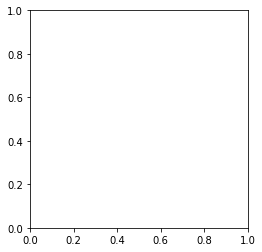

In [217]:
import tensorflow as tf
import gzip
import pickle

def DNN(train_X,train_Y,test_X,test_y):
    # Scale data (normalization), easier for network to learn:
    plt.imshow(train_X[0])
    plt.show
    train_X = tf.keras.utils.normalize(train_X,axis=1)
    test_X = tf.keras.utils.normalize(test_X,axis=1)

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu )) 
    model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu )) 
    model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax ))

    model.compile(optimizer ='adam',
                 loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    # train:
    model.fit(train_X, train_Y, epochs = 3)
    loss, accuracy = evaluate_model(model)
    return loss, accuracy


# Helper function trained model:
def evaluate_model(model):
    val_loss, val_acc = model.evaluate(test_X, test_y)
    return val_loss, val_acc

l, a = DNN(train_set_raw1,train_set_raw.iloc[:,-1].tolist(),test_set_raw1,[test_set_raw.iloc[:,-1].tolist())
